# lib

# 作成した各種関数などをまとめるノート

In [1]:
import copy
import glob
import japanize_matplotlib
import math
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import random
import sys
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as sp
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# ノートブック中で変数のみを記述することでデータフレームをきれいに表示させる設定の有効化
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# 各種値を宣言
benchmarks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp']
classes = ["S", "W", "A", "B", "C", "D"]
processes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
fix_process = 4
fix_benchmark_class = "C"

In [4]:
def return_fixed_class(BenchMark="bt", Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchMarkClass="C"):
    path = './csv_files/'

    # fixed_Class にはベンチマーククラスFixedBenchMarkClassで実行プロセス数がProcessesに該当するものの結果が入る
    fixed_Class = []

    for process in Processes:
        file_name = ("pprof_"+BenchMark +
                     FixedBenchMarkClass+str(process)+".csv")
        file_path = path+file_name
        if (os.path.exists(file_path) and os.stat(file_path).st_size != 0):
            data_frame = pd.read_csv(path+file_name)
            data_frame = data_frame.set_index(['Name'])
            fixed_Class.append(data_frame.rename(
                columns={'#Call': process}).sort_index())
    return(fixed_Class)

In [5]:
def show_fixed_class_graph(BenchMark="bt", Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchMarkClass="C"):

    markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "D", "d", "|", "_", "None", None, "", "$x$",
               "$\\alpha$", "$\\beta$", "$\\gamma$"]
    colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
              '#ff7f00', '#ffff33', '#a65628', '#f781bf']
    fixed_Class = return_fixed_class(
        BenchMark=BenchMark, Processes=Processes, FixedBenchMarkClass=FixedBenchMarkClass)
    if(len(fixed_Class) != 0):
        summary_fixed_Class = pd.concat(fixed_Class, axis=1)
        summary_fixed_Class.sort_index(axis=1, inplace=True)
        summary_fixed_Class_title = BenchMark + \
            "においてベンチマーククラスをCに固定し実行プロセス数を変化させたときの実行された全ての関数のコール回数"

        x_axes = summary_fixed_Class.columns.tolist()

        y_axes = summary_fixed_Class.index.tolist()

        plt.figure()
        for y_axis in y_axes:
            color = random.choice(colors)
            label = y_axis
            marker = random.choice(markers)
            plt.plot(
                x_axes, summary_fixed_Class.T[y_axis], marker=marker, label=y_axis)
        plt.legend()
        plt.title(BenchMark+"_FixedBenchMarkClass="+FixedBenchMarkClass)
        plt.show()

# 使用例
# show_fixed_class_graph(BenchMark="cg")

In [6]:
def return_fixed_process(BenchMark="bt", BenchMarkClasses=["S", "W", "A", "B", "C", "D"], FixedProcess=32):
    path = './csv_files/'

    # fixed_process には実行プロセス数が64でベンチマーククラスがA ~ Dまでの結果が入る
    fixed_process = list()

    for bench_mark_class in BenchMarkClasses:
        file_name = ("pprof_"+BenchMark+bench_mark_class +
                     str(FixedProcess)+".csv")
        file_path = path+file_name
        if (os.path.exists(file_path) and os.stat(file_path).st_size != 0):
            data_frame = pd.read_csv(path+file_name)
            data_frame = data_frame.set_index(['Name'])
            fixed_process.append(data_frame.rename(
                columns={'#Call': bench_mark_class}).sort_index())
    return(fixed_process)

In [7]:

def show_fixed_process_graph(BenchMark="bt", BenchMarkClasses=["S", "W", "A", "B", "C", "D"], FixedProcess=32):
    fixed_process = return_fixed_process(
        BenchMark=BenchMark, BenchMarkClasses=BenchMarkClasses, FixedProcess=FixedProcess)
    markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "D", "d", "|", "_", "None", None, "", "$x$",
               "$\\alpha$", "$\\beta$", "$\\gamma$"]
    colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3',
              '#ff7f00', '#ffff33', '#a65628', '#f781bf']
    if (len(fixed_process) != 0):
        summary_fixed_process = pd.concat(fixed_process, axis=1)

        x_axes = summary_fixed_process.columns.tolist()

        y_axes = summary_fixed_process.index.tolist()

        plt.figure()
        for y_axis in y_axes:
            color = random.choice(colors)
            label = y_axis
            marker = random.choice(markers)
            plt.plot(
                x_axes, summary_fixed_process.T[y_axis], marker=marker, label=y_axis)
        plt.legend()
        plt.title(BenchMark+"_FixedProcess="+str(FixedProcess))
        plt.show()

# 使用例
# show_fixed_process_graph(BenchMark="cg")

In [8]:
def show_graph(BenchMarks=[], Processes=[], BenchMarkClasses=[], fix_process=4, fix_benchmark_class="C"):

    if (BenchMarks == [] or Processes == [] or BenchMarkClasses == []):
        print("関数の引数となっている配列が空です。")
    else:
        for bench_mark in BenchMarks:
            show_fixed_class_graph(
                BenchMark=bench_mark, Processes=Processes, FixedBenchMarkClass=fix_benchmark_class)
            show_fixed_process_graph(
                BenchMark=bench_mark, BenchMarkClasses=BenchMarkClasses, FixedProcess=fix_process)


bench_marks = ['bt', 'cg', 'ep', 'ft', 'is', 'lu', 'mg', 'sp']
processes = [1, 2, 4, 8, 16, 32, 64, 128, 256]
classes = ["S", "W", "A", "B", "C", "D"]

# 使用例
# show_graph(bench_marks, processes, classes)

In [9]:
def return_summarized_Fixed_dataframe(BenchMark_name="cg", fixed="class"):

    def evaluate_dataframes(df1, df2):
        for i in range(len(df1.values.tolist()[0])):
            if(df1.values.tolist()[0][i] != df2.values.tolist()[0][i]):
                return False
        return True
    fixed_df = 0
    if (fixed == "class"):
        fixed_df = return_fixed_class(BenchMark=BenchMark_name)
    elif (fixed == "process"):
        fixed_df = return_fixed_process(BenchMark=BenchMark_name)
    summary_fixed_df = pd.concat(fixed_df, axis=1)
    dropped_summary_fixed_df = summary_fixed_df.drop_duplicates()
    dropped_summary_fixed_df_renamed = dropped_summary_fixed_df

    for dropped_index_name in dropped_summary_fixed_df.index.values:
        dropped_index_name_data = summary_fixed_df.loc[[dropped_index_name]]
        replace_name = dropped_index_name
        for all_index_name in summary_fixed_df.index.values:
            all_index_name_data = summary_fixed_df.loc[[all_index_name]]
            if(dropped_index_name == all_index_name):
                pass
            elif(evaluate_dataframes(dropped_index_name_data, all_index_name_data)):
                replace_name += f", {all_index_name}"
        dropped_summary_fixed_df_renamed = dropped_summary_fixed_df_renamed.rename(
            index={dropped_index_name: replace_name})

    return dropped_summary_fixed_df_renamed

In [10]:
# 平均絶対パーセント誤差 (MAPE)(Mean Absolute Percent Error (MAPE))を返す関数
# 引数として長さの同じ二つのリストをとる
# 引数l1: 実測値のリスト
# 引数l2: 予測値のリスト

def mape_score(l1, l2):
    return_num = 0
    if(len(l1) != len(l2)):
        print("引数のリストの長さが異なります", end=", ")
        return -1
    for i in range(len(l1)):
        l1_num = l1[i]
        l2_num = l2[i]

        return_num += abs((l1_num - l2_num)/l1_num)

    return_num /= len(l1)
    return_num *= 100
    return return_num


# 使用例：mape_score([1,2,3,4], [4,3,2,1])
type(mape_score([1, 2, 3, 4], [4, 3, 2, 1]))

float

In [11]:
def split_by_ratio(base_list: list, test_ratio: float):
    test_index = math.floor(len(base_list) * float(test_ratio))
    train_list = base_list[:-test_index]
    test_list = base_list[-test_index:]
    if(test_ratio == 0):
        return base_list, []
    return train_list, test_list


class ModelBase:
    def __init__(self, raw_x, raw_y, benchmark_name="benchmark_name", function_name="function_name", test_ratio=0.3):
        self.benchmark_name = benchmark_name
        self.function_name = function_name
        self.xlabel = "実行時のプロセス数"
        self.ylabel = "プロセスごとの関数コール回数"

        self.raw_x = np.reshape(raw_x, (-1, 1))
        self.raw_y = np.reshape(raw_y, (-1, 1))
        self.train_x, self.test_x = split_by_ratio(self.raw_x, test_ratio)
        self.train_y, self.test_y = split_by_ratio(self.raw_y, test_ratio)

        if(len(self.train_x) == len(self.test_x) or len(self.train_y) == len(self.test_y)):
            print(f"学習用とテスト用にデータを分割するのに問題が生じています。@{benchmark_name}")
            print(f"len(self.train_x) == {len(self.train_x)}")
            print(f"len(self.train_y) ==  {len(self.train_y)}")
            print(f"len(self.test_x) == {len(self.test_x)}")
            print(f"len(self.test_y) == {len(self.test_y)}")

        self.x_model_line = np.reshape(
            np.arange(start=0.1, stop=self.raw_x.max(), step=0.1), (-1, 1))
        self.y_model_line = 0

        self.lr = 0
        self.r2_score = 0

    def calc_lr(self):
        self.lr = 0

    def calc_r2_score(self):
        self.r2_score = 0

    def calc_mae_score(self):
        self.mae_score = 0

    def calc_mse_score(self):
        self.mse_score = 0

    def calc_rmse_score(self):
        self.rmse_score = 0

    def calc_mape_score(self):
        self.mape_score = 0

    def plot_graph(self):
        plt.figure()
        plt.plot(self.raw_x, self.raw_y, color="red")
        plt.show()

In [12]:
class ModelLin(ModelBase):
    def calc_lr(self, AllData=False):
        self.lr = LinearRegression()
        self.lr.fit(self.train_x, self.train_y)

    def calc_r2_score(self):
        test_y_predicted = self.lr.predict(self.test_x)
        self.r2_score = r2_score(self.test_y, test_y_predicted)

    def calc_mae_score(self):
        test_y_predicted = self.lr.predict(self.test_x)
        self.mae_score = mean_absolute_error(self.test_y, test_y_predicted)

    def calc_mse_score(self):
        test_y_predicted = self.lr.predict(self.test_x)
        self.mse_score = mean_squared_error(self.test_y, test_y_predicted)

    def calc_rmse_score(self):
        self.calc_mse_score()
        self.rmse_score = np.sqrt(self.mse_score)

    def calc_mape_score(self):
        test_y_predicted = self.lr.predict(self.test_x)
        self.mape_score = float(mape_score(self.test_y, test_y_predicted))

    def calc_mape_score_InTrain(self):
        train_y_predicted = self.lr.predict(self.train_x)
        self.mape_score_InTrain = float(
            mape_score(self.train_y, train_y_predicted))

    def plot_graph(self, save=False, fileName="graph.pdf"):
        plt.figure()
        plt.scatter(self.raw_x, self.raw_y)
        self.y_model_line = self.lr.predict(self.x_model_line)
        plt.plot(self.x_model_line, self.y_model_line, color="red")
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        if(save):
            plt.savefig(fileName)

    def predict(self, num):
        predicted = self.lr.predict(num)
        return(predicted)

    def ModelName(self):
        return("ModelLin")

In [13]:
def inverter_log10_func(x):
    return 10**x


class ModelLog10(ModelBase):

    def calc_lr(self, AllData=False):
        self.transformer_log10 = sp.FunctionTransformer(
            func=np.log10, inverse_func=inverter_log10_func)
        x_train_log10 = self.transformer_log10.transform(self.train_x)
        y_train_log10 = self.transformer_log10.transform(self.train_y)

        self.lr = LinearRegression()
        self.lr.fit(x_train_log10, y_train_log10)

    def calc_r2_score(self):
        train_x_log10 = self.transformer_log10.transform(self.train_x)
        train_y_predicted_log10 = self.lr.predict(train_x_log10)
        train_y_predicted = self.transformer_log10.inverse_transform(
            train_y_predicted_log10)
        self.r2_score = r2_score(self.train_y, train_y_predicted)

    def calc_mae_score(self):
        train_x_log10 = self.transformer_log10.transform(self.train_x)
        train_y_predicted_log10 = self.lr.predict(train_x_log10)
        train_y_predicted = self.transformer_log10.inverse_transform(
            train_y_predicted_log10)
        self.mae_score = mean_absolute_error(self.train_y, train_y_predicted)

    def calc_mse_score(self):
        train_x_log10 = self.transformer_log10.transform(self.train_x)
        train_y_predicted_log10 = self.lr.predict(train_x_log10)
        train_y_predicted = self.transformer_log10.inverse_transform(
            train_y_predicted_log10)
        self.mse_score = mean_squared_error(self.train_y, train_y_predicted)

    def calc_rmse_score(self):
        self.calc_mse_score()
        self.rmse_score = np.sqrt(self.mse_score)

    def calc_mape_score(self):
        test_x_log10 = self.transformer_log10.transform(self.test_x)
        test_y_predicted_log10 = self.lr.predict(test_x_log10)
        test_y_predicted = self.transformer_log10.inverse_transform(
            test_y_predicted_log10)
        self.mape_score = float(mape_score(self.test_y, test_y_predicted))

    def calc_mape_score_InTrain(self):
        train_x_log10 = self.transformer_log10.transform(self.train_x)
        train_y_predicted_log10 = self.lr.predict(train_x_log10)
        train_y_predicted = self.transformer_log10.inverse_transform(
            train_y_predicted_log10)
        self.mape_score_InTrain = float(
            mape_score(self.train_y, train_y_predicted))

    def plot_graph(self, save=False, fileName="graph.pdf"):
        plt.figure()
        plt.scatter(self.raw_x, self.raw_y)
        x_model_line_log10 = self.transformer_log10.transform(
            self.x_model_line)
        y_model_line_log10 = self.lr.predict(x_model_line_log10)
        self.y_model_line = self.transformer_log10.inverse_transform(
            y_model_line_log10)
        plt.plot(self.x_model_line, self.y_model_line, color="red")
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        if(save):
            plt.savefig(fileName)

    def predict(self, num):
        num_log10 = self.transformer_log10.transform(num)
        predicted_log10 = self.lr.predict(num_log10)
        predicted = self.transformer_log10.inverse_transform(predicted_log10)
        return(predicted)

    def return_coef_(self):
        return self.lr.coef_

    def return_intercept_(self):
        return self.lr.intercept_

    def ModelName(self):
        return("ModelLog10")

In [14]:
# Inverse proportion
def ip_func(x):
    return 1/x


class ModelIP(ModelBase):

    def calc_lr(self, AllData=False):
        self.transformer_ip = sp.FunctionTransformer(
            func=ip_func, inverse_func=ip_func)
        y_train_ip = self.transformer_ip.transform(self.train_y)
        self.lr = LinearRegression()
        self.lr.fit(self.train_x, y_train_ip)

    def calc_r2_score(self):
        train_y_predicted_ip = self.lr.predict(self.train_x)
        train_y_predicted = self.transformer_ip.inverse_transform(
            train_y_predicted_ip)
        self.r2_score = r2_score(self.train_y, train_y_predicted)

    def calc_mae_score(self):
        train_y_predicted_ip = self.lr.predict(self.train_x)
        train_y_predicted = self.transformer_ip.inverse_transform(
            train_y_predicted_ip)
        self.mae_score = mean_absolute_error(self.train_y, train_y_predicted)

    def calc_mse_score(self):
        train_y_predicted_ip = self.lr.predict(self.train_x)
        train_y_predicted = self.transformer_ip.inverse_transform(
            train_y_predicted_ip)
        self.mse_score = mean_squared_error(self.train_y, train_y_predicted)

    def calc_rmse_score(self):
        self.calc_mse_score()
        self.rmse_score = np.sqrt(self.mse_score)

    def calc_mape_score(self):
        test_y_predicted_ip = self.lr.predict(self.test_x)
        test_y_predicted = self.transformer_ip.inverse_transform(
            test_y_predicted_ip)
        self.mape_score = float(mape_score(self.test_y, test_y_predicted))

    def calc_mape_score_InTrain(self):
        train_y_predicted_ip = self.lr.predict(self.train_x)
        train_y_predicted = self.transformer_ip.inverse_transform(
            train_y_predicted_ip)
        self.mape_score_InTrain = float(
            mape_score(self.train_y, train_y_predicted))

    def plot_graph(self, save=False, fileName="graph.pdf"):
        plt.figure()
        plt.scatter(self.raw_x, self.raw_y)
        y_model_line_ip = self.lr.predict(self.x_model_line)
        self.y_model_line = self.transformer_ip.inverse_transform(
            y_model_line_ip)
        plt.plot(self.x_model_line, self.y_model_line, color="red")
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        if(save):
            plt.savefig(fileName)

    def predict(self, num):
        predicted_ip = self.lr.predict(num)
        predicted = self.transformer_ip.inverse_transform(predicted_ip)
        return(predicted)

    def ModelName(self):
        return("ModelIP")

In [15]:
class ModelBranch(ModelBase):

    def calc_lr(self, AllData=False):
        # 後述する t を算出するための処理
        max_in_train_y = max(self.train_y)
        max_in_train_y_first_index = self.train_y.tolist().index(max_in_train_y)
        # 分岐点のインデックスを t とする
        t = max_in_train_y_first_index
        self.t = t
        if(self.t == 0 or self.t == len(self.train_y) - 1):
            self.lr1 = LinearRegression()
            self.lr1.fit(self.train_x, self.train_y)
            self.lr2 = LinearRegression()
            self.lr2.fit(self.train_x, self.train_y)
        else:
            self.x_train_1 = self.train_x[:t]
            self.x_train_2 = self.train_x[t:]
            self.y_train_1 = self.train_y[:t]
            self.y_train_2 = self.train_y[t:]
            self.lr1 = LinearRegression()
            self.lr1.fit(self.x_train_1, self.y_train_1)
            self.lr2 = LinearRegression()
            self.lr2.fit(self.x_train_2, self.y_train_2)

    def calc_mape_score(self):
        if(self.t == 0 or self.t == len(self.train_y) - 1):
            test_y_predicted = self.lr1.predict(self.test_x)
            self.mape_score = float(mape_score(self.test_y, test_y_predicted))
        else:
            x_test = self.test_x
            y_test = self.test_y
            y_test_predicted = self.lr2.predict(x_test)
            self.mape_score = float(mape_score(y_test, y_test_predicted))

    def calc_mape_score_InTrain(self):
        if(self.t == 0 or self.t == len(self.train_y) - 1):
            train_y_predicted = self.lr1.predict(self.train_x)
            self.mape_score_InTrain = float(
                mape_score(self.train_y, train_y_predicted))
        else:
            train_y_predicted_1 = self.lr1.predict(self.x_train_1)
            train_y_predicted_2 = self.lr2.predict(self.x_train_2)
            mape_1 = float(mape_score(self.y_train_1, train_y_predicted_1))
            mape_2 = float(mape_score(self.y_train_2, train_y_predicted_2))
            self.mape_score_InTrain = (mape_1 + mape_2) / 2

    def plot_graph(self, save=False, fileName="graph.pdf"):
        plt.figure()
        plt.scatter(self.raw_x, self.raw_y)

        if(self.t == 0 or self.t == len(self.train_y) - 1):
            y_model_line = self.lr.predict(x_model_line)
            plt.plot(self.x_model_line, y_model_line, color="red")
        else:
            # 回帰曲線を二つのモデルで分割するための処理
            x_model_line = self.x_model_line
            t_in_model_line = 0
            for i in range(len(x_model_line)):
                if (self.train_x[self.t] < x_model_line[i]):
                    t_in_model_line = i
                    break
                else:
                    t_in_model_line = i

            x_model_line1 = self.x_model_line[:t_in_model_line]
            x_model_line2 = self.x_model_line[t_in_model_line:]
            y_model_line1 = self.lr1.predict(x_model_line1)
            y_model_line2 = self.lr2.predict(x_model_line2)

            plt.plot(x_model_line1, y_model_line1, color="red")
            plt.plot(x_model_line2, y_model_line2, color="red")
    #         plt.plot(self.test_x, self.test_y, color="yellow")
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel)
        if(save):
            plt.savefig(fileName)

    def predict(self, num):
        #         if num < self.raw_x[self.t]:
        #             predicted = self.lr1.predict(num)
        #         else:
        #             predicted = self.lr2.predict(num)
        predicted = self.lr2.predict(num)
        return(predicted)

    def ModelName(self):
        return("ModelBranch")

In [16]:

def return_dict_summary_fixed(benchmark_name="cg", fixed="class"):
    if (fixed == "class"):
        fixed_ = return_fixed_class(BenchMark=benchmark_name)
    else:
        fixed_ = return_fixed_process(BenchMark=benchmark_name)
    summary_fixed_ = pd.concat(fixed_, axis=1)
    columns = summary_fixed_.columns.to_numpy()
    index = summary_fixed_.index.to_numpy()
    if(fixed == "class"):
        dict_summary_fixed_ = {"processes": columns}
    else:
        dict_summary_fixed_ = {"class": columns}
    for index_name in index:
        dict_summary_fixed_[
            index_name] = summary_fixed_.T[index_name].to_numpy()
    return dict_summary_fixed_

# NaNが入った引数のリストをNaNのみを0にして返す関数


def return_non_NaN_list(target_list):
    for i in range(len(target_list)):
        if (math.isnan(target_list[i])):
            target_list[i] = 0
    return target_list
# NaNが入ったリストが引数として渡されるとTrueを返す関数


def does_include_nan(target_list):
    for i in range(len(target_list)):
        if(math.isnan(target_list[i])):
            return True
    return False

In [17]:
# 線形・対数・反比例モデルでフィッティングを行い、MAPE値をまとめたCSVファイルを作成する関数
def generateScoreTable(benchmark_name="cg"):
    list_ScoreTable = []
    dict_summary_fixed_class = return_dict_summary_fixed(
        benchmark_name=benchmark_name, fixed="class")
    raw_x = dict_summary_fixed_class["processes"]
    for content in dict_summary_fixed_class:
        if(content == "processes"):
            continue
        raw_y = dict_summary_fixed_class[content]
        if(does_include_nan(raw_y)):
            continue
        # 線形モデル
        model_lin = ModelLin(raw_x, raw_y, benchmark_name, content)
        model_lin.calc_lr()
        model_lin.calc_r2_score()
        model_lin.calc_mae_score()
        model_lin.calc_mse_score()
        model_lin.calc_rmse_score()
        model_lin.calc_mape_score()
        # logモデル
        model_log10 = ModelLog10(raw_x, raw_y, benchmark_name, content)
        model_log10.calc_lr()
        model_log10.calc_r2_score()
        model_log10.calc_mae_score()
        model_log10.calc_mse_score()
        model_log10.calc_rmse_score()
        model_log10.calc_mape_score()
        # 反比例モデル
        model_ip = ModelIP(raw_x, raw_y, benchmark_name, content)
        model_ip.calc_lr()
        model_ip.calc_r2_score()
        model_ip.calc_mae_score()
        model_ip.calc_mse_score()
        model_ip.calc_rmse_score()
        model_ip.calc_mape_score()

        list_ScoreTable.append(
            [content, model_lin.mape_score, model_log10.mape_score, model_ip.mape_score])
    df_ScoreTable = pd.DataFrame(list_ScoreTable)
    df_ScoreTable.columns = ["", "x mape", "logx mape", "1/x mape"]
    df_ScoreTable.set_index("", inplace=True)
    df_ScoreTable.to_csv("./tmp_GenerateScoreTable/"+benchmark_name+".csv")

In [18]:
# 行の内容が同じものをまとめ、行タイトルに重複した行タイトルがまとめられた、データフレームが返される関数

def return_summarized_Fixed_dataframe(BenchMark_name="cg", fixed="class"):

    def evaluate_dataframes(df1, df2):
        for i in range(len(df1.values.tolist()[0])):
            if(df1.values.tolist()[0][i] != df2.values.tolist()[0][i]):
                return False
        return True
    fixed_df = 0
    if (fixed == "class"):
        fixed_df = return_fixed_class(BenchMark=BenchMark_name)
    elif (fixed == "process"):
        fixed_df = return_fixed_process(BenchMark=BenchMark_name)
    summary_fixed_df = pd.concat(fixed_df, axis=1)
    dropped_summary_fixed_df = summary_fixed_df.drop_duplicates()
    dropped_summary_fixed_df_renamed = dropped_summary_fixed_df

    for dropped_index_name in dropped_summary_fixed_df.index.values:
        dropped_index_name_data = summary_fixed_df.loc[[dropped_index_name]]
        replace_name = dropped_index_name
        for all_index_name in summary_fixed_df.index.values:
            all_index_name_data = summary_fixed_df.loc[[all_index_name]]
            if(dropped_index_name == all_index_name):
                pass
            elif(evaluate_dataframes(dropped_index_name_data, all_index_name_data)):
                replace_name += f", {all_index_name}"
        dropped_summary_fixed_df_renamed = dropped_summary_fixed_df_renamed.rename(
            index={dropped_index_name: replace_name})

    return dropped_summary_fixed_df_renamed

In [19]:
# ~~~_excludeBTSP, ~~~_onlyBTSP はそれぞれのベンチマークで取得したプロセス数
processes_excludeBTSP = [1, 2, 4, 8, 16, 32, 64, 128, 256]
processes_onlyBTSP = [1, 4, 16, 64, 256]

# 引数に横軸：プロセス数orベンチマーククラス, 縦軸：関数名となっているデータフレームを取る
# 返値として
# rowData:プロセス数のリスト もしくは プロセス数のリスト (引数に由来)
# 各種関数名：実行回数のリスト
# 以上のような関係の辞書を返す


def return_dict_Data(DataFrame):
    columns = DataFrame.columns.to_numpy()
    index = DataFrame.index.to_numpy()
    # 返値となる辞書return_dictに引数のデータフレームの列名(プロセス数orベンチマーククラス)を格納
    return_dict = {"rowData": columns}
    for index_name in index:
        return_dict[index_name] = DataFrame.T[index_name].to_numpy()

    return return_dict


### 引数はx軸となる値のリスト, y軸となる値のリスト, 関数名の文字列, 訓練データでMAPEを算出するかどうかの真偽
# 返り値は次のようなリスト
# [<関数名の文字列>, <線形モデルのMAPE値>, <対数モデルのMAPE値>, <反比例モデルのMAPE値>, <分岐モデルのMAPE値>]
def return_Mape_row_list(x: list, y: list, function_name: str, test_ratio=0.3, train=False):

    # 変数：model_lin
    # 線形モデル
    model_lin = ModelLin(x, y, test_ratio=test_ratio)
    if(test_ratio == 0):
        model_lin.train_x = model_lin.raw_x
        model_lin.train_y = model_lin.raw_y
    model_lin.calc_lr()
    model_lin.calc_mape_score()
    model_lin.calc_mape_score_InTrain()

    # 変数：model_log
    # 対数モデル
    model_log = ModelLog10(x, y, test_ratio=test_ratio)
    if(test_ratio == 0):
        model_log.train_x = model_log.raw_x
        model_log.train_y = model_log.raw_y
    model_log.calc_lr()
    model_log.calc_mape_score()
    model_log.calc_mape_score_InTrain()

    # 変数：model_ip
    # 反比例モデル
    model_ip = ModelIP(x, y, test_ratio=test_ratio)
    if(test_ratio == 0):
        model_ip.train_y = model_ip.raw_y
        model_ip.train_x = model_ip.raw_x
    model_ip.calc_lr()
    model_ip.calc_mape_score()
    model_ip.calc_mape_score_InTrain()

    # 変数：model_branch
    # 特異点付き条件分岐モデル
    model_branch = ModelBranch(x, y, test_ratio=test_ratio)
    if(test_ratio == 0):
        model_branch.train_x = model_branch.raw_x
        model_branch.train_y = model_branch.raw_y
    model_branch.calc_lr()
    model_branch.calc_mape_score()
    model_branch.calc_mape_score_InTrain()

    if(train == True):
        lin_score = model_lin.mape_score_InTrain
        log_score = model_log.mape_score_InTrain
        ip_score = model_ip.mape_score_InTrain
        branch_score = model_branch.mape_score_InTrain
    else:
        lin_score = model_lin.mape_score
        log_score = model_log.mape_score
        ip_score = model_ip.mape_score
        branch_score = model_branch.mape_score

    # 変数：return_list
    # 返り値となるリスト
    return_list = [function_name, lin_score, log_score, ip_score, branch_score]
    return(return_list)

# 引数は「return_dict_DataFrame()」の返値, テストとして何割のデータを用いるかの割合, 訓練データでMAPEを算出するかの真偽
# 返り値は行・列がモデル名・関数名で要素がMAPE値となっているDataFrame


def return_MapeTable_per_benchmark(dict_data: dict, test_ratio, train=False):

    # 変数：_names
    # 引数の辞書のプロセス数もしくはベンチマーククラスの文字列のリスト
    _names = dict_data['rowData']
    # 変数：function_names
    # 引数の辞書の関数名の文字列のリスト
    function_names = list(dict_data.keys())
    function_names.remove('rowData')

    # リスト変数：before_DataFrame_list
    # 最終的にDataFrameとする元となるリスト
    before_DataFrame_list = []
    collumn_names = ["function name", "Linear model",
                     "Log10 model", "Inverse model", "Branch model"]
    for function_name in function_names:
        if(does_include_nan(dict_data[function_name])):
            continue
        before_DataFrame_list.append(return_Mape_row_list(
            x=_names, y=dict_data[function_name], function_name=function_name, test_ratio=test_ratio, train=train))

    # 変数：return_df
    # 返り値となるリスト
    return_df = pd.DataFrame(before_DataFrame_list)
    return_df.columns = collumn_names
    return_df = return_df.set_index("function name")

    return(return_df)


# 構造体的に利用可能なクラス MapeData
# 各ベンチマークの各モデルごとに作成される。
# 要素として、割合, 最大値, 最小値 がある。
class MapeData:
    def __init__(self):
        self.ratio = 0
        self.max = np.nan
        self.min = np.nan
        self.appearance = 0

    def printData(self):
        print(f"{self.ratio}({self.min}, {self.max})")

    def return_Data(self):
        max_min = ""
        if(self.min is np.nan):
            max_min = "(NoData)"
        else:
            max_min = f"({self.min}, {self.max})"
        return(f"{self.ratio}%{max_min}")

# 引数に「return_MapeTable_per_benchmark()」の返り値, ベンチマーク名, (オプショナル)中間データの詳細をとる
# 返り値として次のようなリストを返す
# [<線形モデルのMAPEに関する奴>, <対数モデルのMAPEに関する奴>, <反比例モデルのMAPEに関する奴>, <ベンチマーク名>]


def return_MapeTable_row(MapeDataframe_detail, benchmark_name: str):

    # 引数として渡されたデータフレームの行列名をindex, columnsに格納
    columns = MapeDataframe_detail.columns.to_numpy()
    index = MapeDataframe_detail.index.to_numpy()

    # この関数で返すリストの要素の準備
    MapeLin = MapeData()
    MapeLog = MapeData()
    MapeIP = MapeData()
    MapeBr = MapeData()
    return_list = [MapeLin, MapeLog, MapeIP, MapeBr, benchmark_name]

    # 返り値のリストの各要素の値を更新
    for function_name in index:
        MapeData_per_function = MapeDataframe_detail.loc[function_name].to_list(
        )
        min_mape = min(MapeData_per_function)
        min_mape_index = MapeData_per_function.index(min_mape)
        rounded_min_mape = int(min_mape * 10) / 10
        return_list[min_mape_index].appearance += 1
        if(return_list[min_mape_index].max is np.nan):
            return_list[min_mape_index].max = rounded_min_mape
            return_list[min_mape_index].min = rounded_min_mape
        if(return_list[min_mape_index].min > min_mape):
            return_list[min_mape_index].min = rounded_min_mape
        elif(return_list[min_mape_index].max < min_mape):
            return_list[min_mape_index].max = rounded_min_mape
    sum_num = 0
    # 集計データから割合を算出
    for i in range(return_list.index(benchmark_name)):
        sum_num += return_list[i].appearance
    for i in range(return_list.index(benchmark_name)):
        return_list[i].ratio = int(100 * return_list[i].appearance/sum_num)
    # 割合の合計が100になるように調整
    exclude_index0_ratios = 0
    for i in range(return_list.index(benchmark_name)):
        if i == 0:
            continue
        exclude_index0_ratios += return_list[i].ratio
    return_list[0].ratio = 100 - exclude_index0_ratios

    return(return_list)


def save_MapeTable(MapeTable, suffix=""):
    tmp_table = MapeTable.copy()
    columns = MapeTable.columns.to_numpy()
    index = MapeTable.index.to_numpy()
    for i in range(len(columns)):
        for j in range(len(index)):
            tmp_table.iat[j, i] = tmp_table.iat[j, i].return_Data()
    tmp_table.to_csv(f"./tmp_GenerateResources/MapeTable_{str(suffix)}.csv")

In [20]:
### 引数はx軸となる値のリスト, y軸となる値のリスト, 関数名の文字列
# 返り値は次のようなリスト
# [<関数名の文字列>, <線形モデル>, <対数モデル>, <反比例モデル>, <分岐モデル>]
def return_Model_row_list(x: list, y: list, function_name: str, test_ratio=0.3, train=False):

    # 変数：model_lin
    # 線形モデル
    model_lin = ModelLin(x, y, test_ratio=test_ratio)
    model_lin.calc_lr()
    if(train):
        model_lin.calc_mape_score_InTrain()
    else:
        model_lin.calc_mape_score()

    # 変数：model_log
    # 対数モデル
    model_log = ModelLog10(x, y, test_ratio=test_ratio)
    model_log.calc_lr()
    if(train):
        model_log.calc_mape_score_InTrain()
    else:
        model_log.calc_mape_score()

    # 変数：model_ip
    # 反比例モデル
    model_ip = ModelIP(x, y, test_ratio=test_ratio)
    model_ip.calc_lr()
    if(train):
        model_ip.calc_mape_score_InTrain()
    else:
        model_ip.calc_mape_score()

    # 変数：model_branch
    # 特異点付き条件分岐モデル
    model_branch = ModelBranch(x, y, test_ratio=test_ratio)
    model_branch.calc_lr()
    if(train):
        model_branch.calc_mape_score_InTrain()
    else:
        model_branch.calc_mape_score()

    # 変数：return_list
    # 返り値となるリスト
    return_list = [function_name, model_lin, model_log, model_ip, model_branch]
    return(return_list)

In [21]:
# 引数は、収集するベンチマークのリスト、実行したい学習の割合、固定したいベンチマーククラス
# 返値は無し
# 実行すると、"./tmpGenerateResources" に "<ベンチマーク名>_FixedClassTrain_<テスト割合>.csv" という形式でファイルが生成される

def GenerateMapeTableFixClass(Benchmarks=["cg"], TestRatios=["0.3"], FixBenchmarksClass="C"):
    for test_ratio in TestRatios:
        print(f"test_ratio={test_ratio}")
        print(
            f"train_list, test_list = {split_by_ratio(processes_excludeBTSP, test_ratio)} on processes_excludeBTSP")
        print(
            f"train_list, test_list = {split_by_ratio(processes_onlyBTSP, test_ratio)} on processes_onlyBTSP")
        print(f"\n")
        fixed_class_list = [0] * len(Benchmarks)
        for i in range(len(Benchmarks)):
            if(Benchmarks[i] == "bt" or Benchmarks[i] == "sp"):
                process = processes_onlyBTSP
            else:
                process = processes_excludeBTSP
            fixed_class_list[i] = return_fixed_class(
                BenchMark=Benchmarks[i], Processes=processes, FixedBenchMarkClass=FixBenchmarksClass)
        fixed_class_DataFrame = [0] * len(fixed_class_list)
        for i in range(len(fixed_class_list)):
            fixed_class_DataFrame[i] = pd.concat(fixed_class_list[i], axis=1)
        for i in range(len(fixed_class_DataFrame)):
            dict_data = return_dict_Data(fixed_class_DataFrame[i])
            MapeTable_per_benchmark = return_MapeTable_per_benchmark(
                dict_data, test_ratio=test_ratio, train=True)
            MapeTable_per_benchmark.to_csv(
                f"./tmp_GenerateResources/{Benchmarks[i]}_FixedClassTrain_{test_ratio}.csv")
# 使用例
# GenerateMapeTableFixClass(Benchmarks=["cg", "lu"], TestRatios=[0.3, 0.7], FixBenchmarksClass="C")

In [22]:
# 引数は、収集するベンチマークのリスト、実行したい学習の割合、固定したい実行プロセス数
# 返値は無し
# 実行すると、"./tmpGenerateResources" に "<ベンチマーク名>_FixedProcessTrain_<テスト割合>.csv" という形式でファイルが生成される

def GenerateMapeTableFixProcess(Benchmarks=["cg"], BenchmarkClasses=["A", "B", "C", "D"], BenchmarkClasses_on_num=[1, 4, 16, 256], TestRatios=["0.3"], FixProcess=64):
    for test_ratio in TestRatios:
        print(f"test_ratio={test_ratio}")
        print(
            f"train_list, test_list = {split_by_ratio(BenchmarkClasses, test_ratio)} on BenchmarkClasses")
        print(f"\n")
        fixed_Process_list = [0] * len(benchmarks)
        for i in range(len(fixed_Process_list)):
            fixed_Process_list[i] = return_fixed_process(
                BenchMark=Benchmarks[i], BenchMarkClasses=BenchmarkClasses, FixedProcess=FixProcess)
        fixed_Process_DataFrame = [0] * len(fixed_Process_list)
        for i in range(len(fixed_Process_DataFrame)):
            fixed_Process_DataFrame[i] = pd.concat(
                fixed_Process_list[i], axis=1)

        for i in range(len(fixed_Process_DataFrame)):
            dict_data = return_dict_Data(fixed_Process_DataFrame[i])
            dict_data['rowData'] = BenchmarkClasses_on_num
            try:
                MapeTable_per_benchmark = return_MapeTable_per_benchmark(
                    dict_data, test_ratio=test_ratio, train=True)
            except:
                print(f"MAPEを算出するのに問題発生@{Benchmarks[i]}")
                continue
            MapeTable_per_benchmark.to_csv(
                f"./tmp_GenerateResources/{benchmarks[i]}_FixedProcessTrain_{test_ratio}.csv")

In [23]:
def ConvertBencharkClass_inNPB(Alphabet: str):
    if(Alphabet == "A"):
        return (1)
    elif(Alphabet == "B"):
        return (4)
    elif(Alphabet == "C"):
        return (16)
    elif(Alphabet == "D"):
        return (256)
    else:
        return False


def ConvertBencharkClass_inNPB_fromNum(number):
    number = int(number)
    if(number == 1):
        return("A")
    elif(number == 4):
        return("B")
    elif(number == 16):
        return("C")
    elif(number == 256):
        return("D")
    else:
        return False


def ConvertBenchmarkClasses(InputList=["A", "B", "C", "D"]):
    ReturnList = []
    for content in InputList:
        ReturnList.append(ConvertBencharkClass_inNPB(content))
    return(ReturnList)

In [24]:
def return_OptimalProcessesList(BenchmarkName="cg"):
    if(BenchmarkName == "bt" or BenchmarkName == "sp"):
        return(processes_onlyBTSP)
    else:
        return(processes_excludeBTSP)

In [25]:
# 引数は、ベンチマーク名、列名、固定する値、プロセスorクラスのどちらで固定するか
# 返値は次のような形式の辞書
# rowData:[プロセス数]or[ベンチマーククラス]
# <関数名>:[実行回数]
def returnDictForModelDataFrame(BenchmarkName="cg", rowData=["A", "B", "C", "D"], fix="64", fixed="Process"):
    if(fixed == "Process"):
        FixedProcessList = return_fixed_process(
            BenchMark=BenchmarkName, BenchMarkClasses=rowData, FixedProcess=fix)
        FixedProcessDataFrame = pd.concat(FixedProcessList, axis=1)
        DictData = return_dict_Data(FixedProcessDataFrame)
    elif(fixed == "Class"):
        FixedClassList = return_fixed_class(
            BenchMark=BenchmarkName, Processes=rowData, FixedBenchMarkClass=fix)
        FixedClassDataFrame = pd.concat(FixedClassList, axis=1)
        DictData = return_dict_Data(FixedClassDataFrame)
    return(DictData)

In [26]:
# 引数は、returnDictForModelDataFrame()の返値, rowData, 関数名のリスト, テストに割り当てる割合
# 返値はリスト
# [<関数名>, <学習済みデータ1>, ... , <学習済みデータn>]
def return_ModelDataSourceList(DictData, x_list, Index, test_ratio=0.3):
    ModelDataSourceList = []
    for FunctionName in Index:
        y_list = DictData[FunctionName]
        if(does_include_nan(y_list)):
            continue
        ModelDataSourceList.append(return_Model_row_list(
            x=x_list, y=y_list, function_name=FunctionName, test_ratio=test_ratio, train=True))
    return(ModelDataSourceList)

In [27]:
# 引数は、関数名、rowData, テストに割り当てる割合, 固定するプロセス数orクラス, クラスで固定するかプロセス数で固定するか
# 返値はDataFrame
# 行名は関数名で、列名はモデルの種別
# それぞれの要素は学習済みデータ
def return_Models_per_Benchmark(BenchmarkName="cg", rowData=[1, 4, 16, 256], TestRate=0.3, fix="C", fixed="Class"):
    # 変数：MapeTable
    # ベンチマークのMAPE表
    # fixedが"Class"ならクラスで固定され、fixedが"Process"ならプロセス数で固定されたMAPE表を読み込んでいる。
    MapeTable = pd.read_csv(
        f"./tmp_GenerateResources/{BenchmarkName}_Fixed{fixed}Train_{test_ratio}.csv")
    MapeTable = MapeTable.set_index("function name")

    # 変数：MapeTableColumns, MapTableIndex
    # MapeTableの列名・行名
    MapeTableColumns = MapeTable.columns.to_numpy()
    MapeTableIndex = MapeTable.index.to_numpy()

    # 変数：ModelDataFrame
    # MapeTableにおける各関数の学習済みモデルが格納される
    checked_rowData = rowData
    if(fixed == "Process"):
        checked_rowData = ConvertBenchmarkClasses(rowData)
    DictData = returnDictForModelDataFrame(
        BenchmarkName, rowData=rowData, fix=fix, fixed=fixed)
    ModelDataFrameSourceList = return_ModelDataSourceList(
        DictData=DictData, x_list=checked_rowData, Index=MapeTableIndex, test_ratio=TestRate)
    ModelDataFrameSourceListCollumnsName = [
        "FunctionName", "ModelLin", "ModelLog", "ModelIp", "ModelBranch"]
    ModelDataFrame = pd.DataFrame(ModelDataFrameSourceList)
    ModelDataFrame.columns = ModelDataFrameSourceListCollumnsName
    ModelDataFrame = ModelDataFrame.set_index("FunctionName")
    return(ModelDataFrame)

In [28]:
# 引数は、読み込んだベンチマークごとのMAPE表, 各関数の全てのモデルにおける学習済みモデル
# 返値は辞書
# キーは<関数名>でバリューは<学習済みモデル>
def return_BestModelsDict(MapeTable, ModelDataFrame):
    BestModelsDict = {}
    ModelNames = ModelDataFrame.columns.to_list()
    ModelDataFrameIndexNameList = ModelDataFrame.index.to_numpy()
    for FunctionName in ModelDataFrameIndexNameList:
        MapeInFunction = MapeTable.loc[FunctionName].to_list()
        SmallestModelIndex = MapeInFunction.index(min(MapeInFunction))
        SmallestModelName = ModelNames[SmallestModelIndex]
        BestModelsDict[FunctionName] = ModelDataFrame.at[FunctionName,
                                                         SmallestModelName]
    return BestModelsDict

In [29]:
BenchmarkClasses = ["A", "B", "C", "D"]

# 引数は
# 返値は辞書
# キーは<関数名>でバリューは<学習済みモデル>の辞書
# 学習済みモデルのデータフレームの取得に失敗した場合はFalseを返す


def generateBestModelDict(TestRatio=0.3, BenchmarkName="ft", fixed="Class", fix="C", rowData=[1, 2, 4, 8, 16, 32, 64, 128, 256]):

    # 変数：MapeTable
    # ベンチマークのMAPE表
    if(fixed == "Class"):
        file_name = f"{BenchmarkName}_FixedClassTrain_{TestRatio}.csv"
    else:
        file_name = f"{BenchmarkName}_FixedProcessTrain_{TestRatio}.csv"
    file_path = f"./tmp_GenerateResources/{file_name}"
    MapeTable = pd.read_csv(file_path)
    MapeTable = MapeTable.set_index("function name")
#     try:
#         ModelDataFrame = return_Models_per_Benchmark(BenchmarkName=benchmark, rowData=processes, TestRate=test_ratio, fix=fix, fixed=fixed)
#     except:
#         print(f"\n全てのモデル形式で学習済みモデルを作成しているor集めている最中に問題が発生しました@{benchmark}\n")
#         return False
    ModelDataFrame = return_Models_per_Benchmark(
        BenchmarkName=benchmark, rowData=rowData, TestRate=test_ratio, fix=fix, fixed=fixed)

    BestModelsDict = return_BestModelsDict(
        MapeTable=MapeTable, ModelDataFrame=ModelDataFrame)
    return(BestModelsDict)

In [30]:
# 引数は、テストの割合のリスト, rowData
# 返値はrowDataのtrainのリストを文字列化したもののリスト
def return_StringTrainList(TestRatio=[0.3, 0.5], rowData=[1, 2, 4, 8]):
    returnList = []
    for test_ratio in TestRatio:
        train_list, test_list = split_by_ratio(
            base_list=rowData, test_ratio=test_ratio)
        returnList.append(f"{train_list}")
    return(returnList)

In [31]:
# 引数は、関数名, 予測値, ベンチマーク名, ベンチマーククラス, 実行プロセス数
# 返値は予測値と実測値の誤差率(= 予測値/実測値 * 100)
def return_ErrorRate(FunctionName="CG", PredictNum=256, BenchmarkName="cg", BenchmarkClass="D", Process=256):
    target_csv = pd.read_csv(
        f"./csv_files/pprof_{BenchmarkName}{BenchmarkClass}{Process}.csv")
    target_csv = target_csv.set_index("Name")
    try:
        RealNum = target_csv.loc[FunctionName, "#Call"]
    except:
        print(f"該当する関数はありませんでした@{Benchmakname}@{FunctionName}")
        RealNum = False
    if(RealNum != False):
        returnNum = abs(RealNum-PredictNum)/RealNum*100
        return(returnNum)
    else:
        return False

In [32]:
# 予測値を返す関数
# 引数は、学習済みモデル, 予測したいプロセス数もしくはベンチマーククラスを数値化したもの

def return_Predicted(LearnedModel, num):
    Input = np.reshape(num, (-1, 1))
    PredictedData = LearnedModel.predict(Input)
    PredictedList = PredictedData.tolist()
    Predict = PredictedList[0][0]
    return(Predict)

In [33]:

# return_FixedClassModelDF
# 引数で指定されたベンチマークでベンチマーククラスを固定した際の各関数について最適な学習済みモデルを返す関数
def return_FixedClassModelDF(benchmark="cg", FixClass="C"):
    ProcessExcludeBTSP = [1, 2, 4, 8, 16, 32, 64, 128, 256]
    ProcessIncludeBTSP = [1, 4, 16, 64, 256]
    TestRates = [0, 0.2, 0.4, 0.6, 0.8, 0.9]
    if(benchmark == "bt" or benchmark == "sp"):
        processes = ProcessIncludeBTSP
        TestRates = [0, 0.2, 0.4, 0.6, 0.8]
    else:
        processes = ProcessExcludeBTSP

    RawDataFrameSource = return_fixed_class(
        BenchMark=benchmark, Processes=processes, FixedBenchMarkClass=FixClass)
    RawDataFrame = pd.concat(RawDataFrameSource, axis=1)

    x_list = RawDataFrame.columns.tolist()
    FunctionNames = RawDataFrame.index.tolist()
    ModelsInBenchmark = {}
    for FunctionName in FunctionNames:
        BestModelsPerFunction = [0] * len(TestRates)
        y_list = RawDataFrame.loc[FunctionName].tolist()
        for test_ratio in TestRates:
            x_list_splited = split_by_ratio(x_list, test_ratio)[0]
            y_list_splited = split_by_ratio(y_list, test_ratio)[0]
            if(does_include_nan(y_list)):
                continue
            Models = return_Model_row_list(
                x=x_list_splited, y=y_list_splited, function_name=FunctionName, test_ratio=0, train=True)[1:]
            MapeScoreInTrains = [0] * len(Models)
            for i in range(len(Models)):
                MapeScoreInTrains[i] = Models[i].mape_score_InTrain
            BestModelsPerFunction[TestRates.index(
                test_ratio)] = Models[MapeScoreInTrains.index(min(MapeScoreInTrains))]
        if(0 in BestModelsPerFunction):
            continue
        ModelsInBenchmark[FunctionName] = BestModelsPerFunction

    ModelDF = pd.DataFrame.from_dict(ModelsInBenchmark, orient='index')
    ModelDFcolumns = []
    for test_ratio in TestRates:
        ModelDFcolumns.append(f"{split_by_ratio(x_list, test_ratio)[0]}")
    ModelDF.columns = ModelDFcolumns
    return(ModelDF)

In [34]:

# return_FixedProcessModelDF
# 引数で指定されたベンチマークで実行プロセス数を固定した際の各関数について最適な学習済みモデルを返す関数
def return_FixedProcessModelDF(benchmark="cg", FixProcess="64"):
    BenchmarkClasses = ["A", "B", "C", "D"]

    TestRates = [0, 0.4, 0.5, 0.8]
    BenchmarkClassesOnNum = ConvertBenchmarkClasses(BenchmarkClasses)

    RawDataFrameSource = return_fixed_process(
        BenchMark=benchmark, BenchMarkClasses=BenchmarkClasses, FixedProcess=FixProcess)
    RawDataFrame = pd.concat(RawDataFrameSource, axis=1)
    x_list_base = RawDataFrame.columns.tolist()
    x_list = ConvertBenchmarkClasses(copy.deepcopy(x_list_base))
    FunctionNames = RawDataFrame.index.tolist()
    ModelsInBenchmark = {}
    for FunctionName in FunctionNames:
        BestModelsPerFunction = [0] * len(TestRates)
        y_list = RawDataFrame.loc[FunctionName].tolist()
        for test_ratio in TestRates:
            x_list_splited = split_by_ratio(x_list, test_ratio)[0]
            y_list_splited = split_by_ratio(y_list, test_ratio)[0]
            if(does_include_nan(y_list)):
                continue
            Models = return_Model_row_list(
                x=x_list_splited, y=y_list_splited, function_name=FunctionName, test_ratio=0, train=True)[1:]
            MapeScoreInTrains = [0] * len(Models)
            for i in range(len(Models)):
                MapeScoreInTrains[i] = Models[i].mape_score_InTrain
            BestModelsPerFunction[TestRates.index(
                test_ratio)] = Models[MapeScoreInTrains.index(min(MapeScoreInTrains))]
        if(0 in BestModelsPerFunction):
            continue
        ModelsInBenchmark[FunctionName] = BestModelsPerFunction

    ModelDF = pd.DataFrame.from_dict(ModelsInBenchmark, orient='index')
    ModelDFcolumns = []
    for test_ratio in TestRates:
        ModelDFcolumns.append(f"{split_by_ratio(x_list_base, test_ratio)[0]}")
    ModelDF.columns = ModelDFcolumns
    return(ModelDF)


ModelDF = return_FixedProcessModelDF(benchmark="cg")

In [35]:
def return_MapeTableFixedClass(benchmark="cg"):
    DirPath = "./tmp_GenerateResources/"
    try:
        ModelDFfixedClass = return_FixedClassModelDF(benchmark=benchmark)
    except:
        print(f"return_FixedClassModelDF({benchmark})の実行に失敗しました")
        return -1
    ModelDFfixedClass_LowestMape = ModelDFfixedClass
    index = ModelDFfixedClass_LowestMape.index.tolist()
    columns = ModelDFfixedClass_LowestMape.columns.tolist()
    for column in columns:
        for row in index:
            ModelDFfixedClass_LowestMape.at[row,
                                            column] = ModelDFfixedClass.at[row, column].mape_score_InTrain
    average = ModelDFfixedClass_LowestMape.mean()
    average.name = "Average"
    ModelDFfixedClass_LowestMape.append(average)
    return ModelDFfixedClass_LowestMape


def return_MapeTableFixedProcess(benchmark="cg"):
    DirPath = "./tmp_GenerateResources/"
    try:
        ModelDFfixedProcess = return_FixedProcessModelDF(benchmark=benchmark)
    except:
        print(f"return_FixedProcessModelDF({benchmark})の実行に失敗しました")
        return -1
    ModelDFfixedProcess_LowestMape = ModelDFfixedProcess
    index = ModelDFfixedProcess_LowestMape.index.tolist()
    columns = ModelDFfixedProcess_LowestMape.columns.tolist()
    for column in columns:
        for row in index:
            ModelDFfixedProcess_LowestMape.at[row,
                                              column] = ModelDFfixedProcess.at[row, column].mape_score_InTrain
    average = ModelDFfixedProcess_LowestMape.mean()
    average.name = "Average"
    ModelDFfixedProcess_LowestMape.append(average)
    return ModelDFfixedProcess_LowestMape

In [36]:
# return_MapeTableFixed<Class or Process>
# 引数で渡されたベンチマークについて、<クラス or プロセス>を固定したMAPE表となったデータフレームを返す

def return_MapeTableFixedClass(benchmark="cg", FixClass="C"):
    DirPath = "./tmp_GenerateResources/"
    try:
        ModelDFfixedClass = return_FixedClassModelDF(
            benchmark=benchmark, FixClass=FixClass)
    except:
        print(f"return_FixedClassModelDF({benchmark})の実行に失敗しました")
        return -1
    ModelDFfixedClass_LowestMape = ModelDFfixedClass
    index = ModelDFfixedClass_LowestMape.index.tolist()
    columns = ModelDFfixedClass_LowestMape.columns.tolist()
    for column in columns:
        for row in index:
            ModelDFfixedClass_LowestMape.at[row,
                                            column] = ModelDFfixedClass.at[row, column].mape_score_InTrain
    average = ModelDFfixedClass_LowestMape.mean()
    average.name = "Average"
    ModelDFfixedClass_LowestMape = ModelDFfixedClass_LowestMape.append(average)
    return ModelDFfixedClass_LowestMape


def return_MapeTableFixedProcess(benchmark="cg", FixProcess="64"):
    DirPath = "./tmp_GenerateResources/"
    try:
        ModelDFfixedProcess = return_FixedProcessModelDF(
            benchmark=benchmark, FixProcess=FixProcess)
    except:
        print(f"return_FixedProcessModelDF({benchmark})の実行に失敗しました")
        return -1
    ModelDFfixedProcess_LowestMape = ModelDFfixedProcess
    index = ModelDFfixedProcess_LowestMape.index.tolist()
    columns = ModelDFfixedProcess_LowestMape.columns.tolist()
    for column in columns:
        for row in index:
            ModelDFfixedProcess_LowestMape.at[row,
                                              column] = ModelDFfixedProcess.at[row, column].mape_score_InTrain
    average = ModelDFfixedProcess_LowestMape.mean()
    average.name = "Average"
    ModelDFfixedProcess_LowestMape = ModelDFfixedProcess_LowestMape.append(
        average)
    return ModelDFfixedProcess_LowestMape

In [37]:
# Mape表をCSVとして保存する関数
# 引数はbenchmark:ベンチマーク名, FixClass:固定するベンチマーククラス, FixProcess:固定するプロセス数, DirPath:保存するディレクトリ
def SaveMapeTables(FixClass="B", FixProcess=256, DirPath="./tmp_GenerateResources/"):
    for benchmark in benchmarks:
        MapeTableFixedClass = return_MapeTableFixedClass(
            benchmark, FixClass="B")
        MapeTableFixedProcess = return_MapeTableFixedProcess(
            benchmark, FixProcess=256)
        FixedClassFileName = f"MapeTableFixedClass_{benchmark}{FixClass}.csv"
        FixedProcessFileName = f"MapeTableFixedProcess_{benchmark}{FixProcess}.csv"
    #     print(f"FixedClassFileName={FixedClassFileName}, MapeTableFixedProcess={FixedProcessFileName}")
        if(type(MapeTableFixedClass) is pd.core.frame.DataFrame):
            #             print(f"FixedClassFileName={FixedClassFileName}")
            MapeTableFixedClass.to_csv(f"{DirPath}{FixedClassFileName}")
        if(type(MapeTableFixedProcess) is pd.core.frame.DataFrame):
            #             print(f"FixedProcessFileName={FixedProcessFileName}")
            MapeTableFixedProcess.to_csv(f"{DirPath}{FixedProcessFileName}")


# SaveMapeTables(FixClass="C", FixProcess=256)

In [38]:
# クラス：TimeData
# 下記の関数(= return_TimeDataList())のために作成された
# メソッドreturn_AllData()で値のすべてを辞書形式で受けてることができる
class TimeData:
    def __init__(self, benchmark="cg", process="32", BenchmarkClass="C", time=-1):
        self.benchmark = benchmark
        self.process = process
        self.BenchmarkClass = BenchmarkClass
        self.time = time

    def return_AllData(self):
        return {"benchmark": self.benchmark, "process": self.process, "BenchmarkClass": self.BenchmarkClass, "time": self.time}

# 返値に独自クラスTimeDataのリストを返す
# 引数に実行プロセス数を取る
# 返値のリストの要素は引数のリストのプロセス数で実行されたベンチマークの
# ベンチマーク名・実行プロセス数・ベンチマーククラス・実行時間が記録されたTimeDataクラスのインスタンス


def return_TimeDataList(process=256):
    return_list = []
    with open(f"./toGetProfile/toGetTime/TimeWith{process}.txt") as f:
        line_count = 0
        for line in f:
            line_count += 1
            if(line_count % 3 == 1):
                benchmark = line[1:3].lower()
                # print(f"benchmark={benchmark}, len(benchmark)={len(benchmark)}")
                Data = TimeData(benchmark=benchmark, process=process)
            if(line_count % 3 == 2):
                BenchmarkClass = line[-2]
                # print(f"BenchmarkClass={BenchmarkClass}, len(BenchmarkClass)={len(BenchmarkClass)}")
                Data.BenchmarkClass = BenchmarkClass
            if(line_count % 3 == 0):
                Time = line[-25:]
                Time = Time.strip()
                # print(f"Time={Time}")
                Data.time = Time
                return_list.append(Data)
    return(return_list)

In [39]:

# 関数:FillCSV()
# 引数は,benchmark:ベンチマーク名, process:実行プロセス数, BenchmarkClass:ベンチマーククラス, time:実行時間
# 引数として渡された値を適切なCSVに保存する
def FillCSV(benchmark="cg", process=256, BenchmarkClass="A", time="0.04"):
    time = float(time)
    CSVFilename = f"./csv_files/ExecTime@{benchmark}.csv"
    DataFrame = pd.read_csv(CSVFilename, index_col=0)
    DataFrame.at[BenchmarkClass, process] = time
    DataFrame.to_csv(CSVFilename)

In [40]:
# 誤差率の表を作成する関数
# 引数は,benchmark:関数名, predict_class:予測したいクラス, predict_process:予測したいプロセス数, FixProcess:固定する実行プロセス数, FixClass:固定するベンチマーククラス
# 返り値はなし
def GenerateErrorRateTable(benchmark="cg", predict_class="D", predict_process=256, FixProcess=64, FixClass="B"):

    DirName = "./table_LatexForm/"
    FileSuffix = f".table"
    FilePrefix = f"ErrorRateTable@{benchmark}Fixed"

    try:
        ErrorRateFixedProcessDF = return_ErrorRateFixedProcessDF(
            benchmark=benchmark, FixProcess=FixProcess, predict_class=predict_class)
    except:
        print("実行プロセスを固定した際の誤差率の表を取得するのに失敗したので、CSVとして保存できませんでした。")
    ErrorRateFixedProcessDF.to_latex(
        f"{DirName}{FilePrefix}{FixProcess}{FileSuffix}")
    try:
        ErrorRateFixedClassDF = return_ErrorRateFixedClassDF(
            benchmark=benchmark, FixClass=FixClass, predict_process=predict_process)
    except:
        print("ベンチマーククラスを固定した際の誤差率の表を取得するのに失敗したので、CSVとして保存できませんでした。")
    ErrorRateFixedClassDF.to_latex(
        f"{DirName}{FilePrefix}{FixClass}{FileSuffix}")

# 誤差率のデータフレームを返す関数
### return_ErrorRateFixedProcessDF(), return_ErrorRateFixedClassDF()


def return_ErrorRateFixedProcessDF(benchmark="cg", FixProcess=64, predict_class="D"):
    FixProcessDF = return_FixedProcessModelDF(
        benchmark=benchmark, FixProcess=256)
    # print(FixProcessDF)
    for index in FixProcessDF.index.tolist():
        for column in FixProcessDF.columns.tolist():
            PredictNum = return_Predicted(
                FixProcessDF.at[index, column], ConvertBencharkClass_inNPB(predict_class))
            FixProcessDF.at[index, column] = int(return_ErrorRate(
                FunctionName=index, PredictNum=PredictNum, BenchmarkName=benchmark, BenchmarkClass=predict_class, Process=FixProcess)*1000)/1000
    return (FixProcessDF)


def return_ErrorRateFixedClassDF(benchmark="cg", FixClass="B", predict_process=256):
    FixClassDF = return_FixedClassModelDF(benchmark, FixClass=FixClass)
    # print(FixClassDF)
    for index in FixClassDF.index.tolist():
        for column in FixClassDF.columns.tolist():
            PredictNum = return_Predicted(
                FixClassDF.at[index, column], predict_process)
            FixClassDF.at[index, column] = int(return_ErrorRate(
                FunctionName=index, PredictNum=PredictNum, BenchmarkName=benchmark, BenchmarkClass=FixClass, Process=predict_process)*1000)/1000
    return(FixClassDF)

# for benchmark in benchmarks:
#     GenerateErrorRateTable(benchmark=benchmark)

In [41]:
processes_onlyBTSP = [1, 4, 16, 64, 256]
processes_excludeBTSP = [1, 2, 4, 8, 16, 32, 64, 128, 256]
# 関数：reutrn_MapeTableRowDataframe_FixedClass
# 引数：benchmark=<ベンチマーク名>, FixedClass=<固定するクラス>, test_ratio=<テストに用いる割合>
# 返値：引数の指定通りの設定で、各モデルの採用割合, 最大値, 最小値が保持された独自クラスを要素としたデータフレーム


def reutrn_MapeTableRowDataframe_FixedClass(benchmark="cg", FixedClass="B", test_ratio=0.3, enableTrain=True):

    if(benchmark == "bt" or benchmark == "sp"):
        process = processes_onlyBTSP
    else:
        process = processes_excludeBTSP

    FixedClassList = return_fixed_class(
        BenchMark=benchmark, Processes=process, FixedBenchMarkClass=FixedClass)
    FixedClassDataFrame = pd.concat(FixedClassList, axis=1)

    DictData = return_dict_Data(FixedClassDataFrame)
    MapeTablePerBenchmark = return_MapeTable_per_benchmark(
        DictData, test_ratio=test_ratio, train=enableTrain)
    MapeTableRow = return_MapeTable_row(MapeTablePerBenchmark, benchmark)
    MapeTableSource = MapeTableRow
    MapeTableSourceColumnName = [
        "線形モデル", "対数モデル", "反比例モデル", "分岐モデル", "ベンチマーク名"]
    MapeTable = pd.DataFrame(MapeTableSource)
    MapeTable = MapeTable.T
    MapeTable.columns = MapeTableSourceColumnName
    MapeTable = MapeTable.set_index('ベンチマーク名')
    return (MapeTable)


# 関数：return_MapeTableDataframe_FixedClass()
# 引数：FixedClass=<固定するベンチマーククラス>, test_ratio=<テストに用いる割合>
# 返値：引数の指定通りの設定で全てのベンチマークに関する、各モデルの採用割合、最大値、最小値が保持された独自クラスを要素としたデータフレーム
def return_MapeTableDataframe_FixedClass(FixedClass="B", test_ratio=0.3):
    MapeTableRowDataframes_list = []
    for benchmark in benchmarks:
        MapeTableRowDataframe = reutrn_MapeTableRowDataframe_FixedClass(
            benchmark=benchmark, FixedClass=FixedClass, test_ratio=test_ratio, enableTrain=True)
        MapeTableRowDataframes_list.append(MapeTableRowDataframe)
    MapeTableDataframe = pd.concat(MapeTableRowDataframes_list)
    return(MapeTableDataframe)

# 関数：return_MapeTableOnlyStrDataframe()
# 引数：return_MapeTableDataframe_Fixed<Class or Process>()の返値
# 返値：文字列を要素としたMape表のデータフレーム


def return_MapeTableOnlyStrDataframe(input_MapeTableDF):
    index = input_MapeTableDF.index
    columns = input_MapeTableDF.columns
    return_DF = pd.DataFrame().reindex_like(input_MapeTableDF).astype('str')
    for i in index:
        for j in columns:
            contentStr = input_MapeTableDF.at[i, j].return_Data()
            return_DF.at[i, j] = contentStr
    return(return_DF)

# 利用例
# input_MapeTableDF = return_MapeTableDataframe_FixedClass()
# print(return_MapeTableOnlyStrDataframe(input_MapeTableDF=input_MapeTableDF))

In [42]:
# 関数：reutrn_MapeTableRowDataframe_FixedProcess
# 引数：benchmark=<ベンチマーク名>, FixedProcess=<固定する実行プロセス>, test_ratio=<テストに用いる割合>
# 返値：引数の指定通りの設定で、各モデルの採用割合, 最大値, 最小値が保持された独自クラスを要素としたデータフレーム
def reutrn_MapeTableRowDataframe_FixedProcess(benchmark="cg", FixedProcess=256, test_ratio=0.3, enableTrain=True):

    # classes[2:]としているのは、変換関数(ConvertBenchmarkClasses)がベンチマーククラスS, Wの数値化に対応していないため
    classes_inFunc = classes[2:]
    classes_onNum = ConvertBenchmarkClasses(classes_inFunc)

    FixedProcessList = return_fixed_process(
        BenchMark=benchmark, BenchMarkClasses=classes_inFunc, FixedProcess=FixedProcess)
    FixedProcessDataFrame = pd.concat(FixedProcessList, axis=1)

    DictData = return_dict_Data(FixedProcessDataFrame)
    DictData['rowData'] = classes_onNum
    MapeTablePerBenchmark = return_MapeTable_per_benchmark(
        DictData, test_ratio=test_ratio, train=enableTrain)
    MapeTableRow = return_MapeTable_row(MapeTablePerBenchmark, benchmark)
    MapeTableSource = MapeTableRow
    MapeTableSourceColumnName = [
        "線形モデル", "対数モデル", "反比例モデル", "分岐モデル", "ベンチマーク名"]
    MapeTable = pd.DataFrame(MapeTableSource)
    MapeTable = MapeTable.T
    MapeTable.columns = MapeTableSourceColumnName
    MapeTable = MapeTable.set_index('ベンチマーク名')
    return (MapeTable)

# 関数：return_MapeTableDataframe_FixedProcess()
# 引数：FixedProcess=<固定する実行プロセス数>, test_ratio=<テストに用いる割合>
# 返値：引数の指定通りの設定で全てのベンチマークに関する、各モデルの採用割合、最大値、最小値が保持された独自クラスを要素としたデータフレーム


def return_MapeTableDataframe_FixedProcess(FixedProcess=256, test_ratio=0.3):
    MapeTableRowDataframes_list = []
    for benchmark in benchmarks:
        MapeTableRowDataframe = reutrn_MapeTableRowDataframe_FixedProcess(
            benchmark=benchmark, FixedProcess=FixedProcess, test_ratio=test_ratio, enableTrain=True)
        MapeTableRowDataframes_list.append(MapeTableRowDataframe)
    MapeTableDataframe = pd.concat(MapeTableRowDataframes_list)
    return(MapeTableDataframe)

# 利用例
# input_MapeTableDF = return_MapeTableDataframe_FixedProcess()
# print(return_MapeTableOnlyStrDataframe(input_MapeTableDF=input_MapeTableDF))

In [43]:
# 関数：return_ErrorRateFixed<Class or Process>DFwithAverage()
# 引数：benchmark:ベンチマーク名, FixProcess:固定するプロセス数,  predict_class:予測するクラス
# 引数：benchmark:ベンチマーク名, FixClass:固定するクラス数,  predict_process:予測するプロセス数
# 返り値はエラー率の平均が付与されたエラー率の表
def return_ErrorRateFixedProcessDFwithAverate(benchmark="cg", FixProcess=64, predict_class="D"):
    ErrorRateFixedProcessDF = return_ErrorRateFixedProcessDF(
        benchmark=benchmark, FixProcess=FixProcess, predict_class=predict_class)
    average = ErrorRateFixedProcessDF.mean()
    average.name = "Average"
    return(ErrorRateFixedProcessDF.append(average))


def return_ErrorRateFixedClassDFwithAverage(benchmark="cg", FixClass="B", predict_process=256):
    ErrorRateFixedClsssDF = return_ErrorRateFixedClassDF(
        benchmark=benchmark, FixClass=FixClass, predict_process=predict_process)
    average = ErrorRateFixedClsssDF.mean()
    average.name = "Average"
    return(ErrorRateFixedClsssDF.append(average))

# 関数：convert_StrListToIntList()
# 引数：要素はすべて整数なリストのプリント出力
# 返り値：数値のリスト


def convert_StrListToIntList(InputList: list):
    InputList = InputList[1:-1]
    ReturnList = [int(x.strip()) for x in InputList.split(',')]
    return(ReturnList)

# 関数：convert_StrListToStrList()
# 引数：要素はすべて一文字のアルファベットなリストのプリント出力
# 返り値：アルファベットのリスト


def convert_StrListToStrList(InputList: list):
    InputList = InputList[1:-1]
    InputList = InputList.replace('\'', '')
    ReturnList = [x.strip() for x in InputList.split(',')]
    return(ReturnList)

# 関数：return_ExecTime()
# 引数：ベンチマーク名, ベンチマーククラス, 実行プロセス数
# 返り値：引数に該当するベンチマークの実行時間


def return_ExecTime(benchmark="cg", BenchmarkClass="B", Process=256):
    FileDir = "./csv_files/"
    FileName = f"ExecTime@{benchmark}.csv"
    ExecTimeDF = pd.read_csv(f"{FileDir}{FileName}", index_col=0)
    TargetNum = ExecTimeDF.at[BenchmarkClass, f"{Process}"]
    if(np.isnan(TargetNum)):
        TargetNum = -1
    return(TargetNum)

# 関数:return_FixClassCost()
# 引数:benchmark=ベンチマーク名, ProcessList=実行プロセスのリスト, BenchmarkClass=ベンチマーククラス
# 返り値：引数の条件に当てはまるコスト


def return_FixClassCost(benchmark="cg", ProcessList=[1, 2, 4], BenchmarkClass="B"):
    cost = 0
    for process in ProcessList:
        ExecTime = return_ExecTime(
            benchmark=benchmark, BenchmarkClass=BenchmarkClass, Process=process)
        if(ExecTime < 0):
            return(-1)
        cost += ExecTime * process
    return(cost)

# 関数:return_FixProcessCost()
# 引数:benchmark=ベンチマーク名, BenchmarkClassList=ベンチマーククラスのリスト, Process=実行プロセス
# 返り値：引数の条件に当てはまるコスト


def return_FixProcessCost(benchmark="cg", BenchmarkClassList=["A", "B", "C"], Process=256):
    cost = 0
    for BenchmarkClass in BenchmarkClassList:
        ExecTime = return_ExecTime(
            benchmark=benchmark, BenchmarkClass=BenchmarkClass, Process=Process)
        if(ExecTime < 0):
            return(-1)
        cost += ExecTime * Process
    return(cost)


def return_ErrorRateFixedClassAverageAndCosts(benchmark="cg", FixClass="B", predict_process=256):
    ErrorRateFixedClassDFwithAverage = return_ErrorRateFixedClassDFwithAverage(
        benchmark=benchmark, FixClass=FixClass, predict_process=predict_process)
    ErrorRateFixedClassAverageSeries = ErrorRateFixedClassDFwithAverage.loc["Average"]
    ErrorRateFixedClassAverageDF = pd.DataFrame(
        ErrorRateFixedClassAverageSeries)
    index = ErrorRateFixedClassAverageDF.index.tolist()
    columns = ErrorRateFixedClassAverageDF.columns.tolist()
    listedIndex = []
    for i in index:
        listedIndex.append(convert_StrListToIntList(i))
    Costs = []
    for i in listedIndex:
        Costs.append(return_FixClassCost(benchmark=benchmark,
                     ProcessList=i, BenchmarkClass=FixClass))
    ErrorRateFixedClassAverageDF["PredictCosts"] = Costs
    return(ErrorRateFixedClassAverageDF)


def return_ErrorRateFixedProcessAverageAndCosts(benchmark="cg", FixProcess=256, predict_class="D"):
    ErrorRateFixedProcessDFwithAverage = return_ErrorRateFixedProcessDFwithAverate(
        benchmark=benchmark, FixProcess=FixProcess, predict_class=predict_class)
    ErrorRateFixedProcessAverageSeries = ErrorRateFixedProcessDFwithAverage.loc["Average"]
    ErrorRateFixedProcessAverageDF = pd.DataFrame(
        ErrorRateFixedProcessAverageSeries)
    index = ErrorRateFixedProcessAverageDF.index.tolist()
    columns = ErrorRateFixedProcessAverageDF.columns.tolist()
    listedIndex = []
    for i in index:
        listedIndex.append(convert_StrListToStrList(i))
    Costs = []
    for i in listedIndex:
        Costs.append(return_FixProcessCost(benchmark=benchmark,
                     BenchmarkClassList=i, Process=FixProcess))
    ErrorRateFixedProcessAverageDF["PredictCosts"] = Costs
    return(ErrorRateFixedProcessAverageDF)

# benchmark="cg"
# FixProcess=64
# predict_class="D"
# FixClass="B"
# predict_process=256
# BenchmarkClass="B"
# Process=64


def return_ErrorRateFixedClass_AveragePredictCostRealCost(benchmark="cg", FixClass="B", predict_process=256):
    ErrorRateFixedClass = return_ErrorRateFixedClassAverageAndCosts(
        benchmark=benchmark, FixClass=FixClass, predict_process=predict_process)
    index = ErrorRateFixedClass.index.tolist()
    columns = ErrorRateFixedClass.columns.tolist()
    RealClass = FixClass
    RealProcess = predict_process
    RealTime = return_ExecTime(
        benchmark=benchmark, BenchmarkClass=RealClass, Process=RealProcess)
    RealCost = RealProcess * RealTime
    RealCostList = [RealCost] * len(index)
    ErrorRateFixedClass["RealCost"] = RealCostList
    return(ErrorRateFixedClass)


def return_ErrorRateFixedProcess_AveragePredictCostRealCost(benchmark="cg", FixProcess=256, predict_class="D"):
    ErrorRateFixedProcess = return_ErrorRateFixedProcessAverageAndCosts(
        benchmark=benchmark, FixProcess=FixProcess, predict_class=predict_class)
    index = ErrorRateFixedProcess.index.tolist()
    columns = ErrorRateFixedProcess.columns.tolist()
    RealClass = predict_class
    RealProcess = FixProcess
    RealTime = return_ExecTime(
        benchmark=benchmark, BenchmarkClass=RealClass, Process=RealProcess)
    RealCost = RealProcess * RealTime
    RealCostList = [RealCost] * len(index)
    ErrorRateFixedProcess["RealCost"] = RealCostList
    return(ErrorRateFixedProcess)

In [44]:
def GenerateMapeTable(FixedClass="B", FixedProcess="64", test_ratio=0.3):

    DirName = "./table_LatexForm/"
    FileSuffix = f"Train0{int(test_ratio*10)}.table"
    FilePrefix = "MapeTableFixed"

    input_MapeTableDF = return_MapeTableDataframe_FixedProcess(
        FixedProcess=FixedProcess, test_ratio=test_ratio)
    return_MapeTableDF = return_MapeTableOnlyStrDataframe(
        input_MapeTableDF=input_MapeTableDF)
    return_MapeTableDF.to_latex(
        f"{DirName}{FilePrefix}{FixedProcess}{FileSuffix}")
    input_MapeTableDF = return_MapeTableDataframe_FixedClass(
        FixedClass=FixedClass, test_ratio=test_ratio)
    return_MapeTableDF = return_MapeTableOnlyStrDataframe(
        input_MapeTableDF=input_MapeTableDF)
    return_MapeTableDF.to_latex(
        f"{DirName}{FilePrefix}{FixedClass}{FileSuffix}")

# MAPE表を生成する例
# GenerateMapeTable()

In [45]:
# 関数：ConvertIndexNameToNumOfProfile()
# 引数：行名が使用したプロファイル, 列名が平均誤差率・予測コスト・実測コストとなっているデータフレーム
# 返値：
def ConvertIndexNameToNumOfProfile(inputDF, Fixed="Process"):
    index = inputDF.index.tolist()
    # ConvertedIndexには入力データフレームの行名から使用されたプロファイルの数を格納している。
    ConvertedIndex = [0] * len(index)
    for i in range(len(index)):
        if(Fixed == "Process"):
            ConvertedIndex[i] = len(convert_StrListToStrList(index[i]))
        elif(Fixed == "Class"):
            ConvertedIndex[i] = len(convert_StrListToIntList(index[i]))
    returnDF = inputDF.copy(deep=True)
    returnDF.index = ConvertedIndex
    return(returnDF)

In [46]:
def GenGraphAveragePerProfileNum(benchmarks=["cg"], Fixed="Process", Fix=64, Predict="D", EnableTitle=False, EnableScatter=False, SaveGraph=False):
    plt.figure(figsize=(8, 5))
    for benchmark in benchmarks:
        if(Fixed == "Process"):
            FixedDF = return_ErrorRateFixedProcess_AveragePredictCostRealCost(
                benchmark=benchmark, FixProcess=Fix, predict_class=Predict)
            GraphTitle = f"ベンチマーク{benchmarks}で実行プロセス数を固定"
        else:
            FixedDF = return_ErrorRateFixedClass_AveragePredictCostRealCost(
                benchmark=benchmark, FixClass=Fix, predict_process=Predict)
            GraphTitle = f"ベンチマーク{benchmarks}でベンチマーククラスを固定"
        ConvertedIndexFixedDF = ConvertIndexNameToNumOfProfile(
            FixedDF, Fixed=Fixed)
        x = ConvertedIndexFixedDF.index.tolist()
        y = ConvertedIndexFixedDF["Average"].tolist()
        plt.plot(x, y, label=f"{benchmark.upper()}", marker='o')
        if(EnableScatter):
            plt.scatter(x, y)
        plt.legend()
    plt.xlabel("使用したプロファイル数")
    plt.ylabel("平均絶対誤差率 [%]")
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    if(EnableTitle):
        plt.title(GraphTitle)
    if(Fixed == "Process"):
        plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
        plt.subplots_adjust(right=0.9)
    plt.yscale('log')
    if(SaveGraph):
        filename = f"Fix{Fixed}AverageError.pdf"
        plt.savefig(f"./tmp_GenerateResources/{filename}")
    else:
        plt.show()

# 使用例
# GenGraphAveragePerProfileNum(benchmarks=benchmarks, Fixed="Process", Fix=64, Predict="D")
# GenGraphAveragePerProfileNum(benchmarks=benchmarks, Fixed="Class", Fix="B", Predict=256)

In [47]:
# for benchmark in benchmarks:
#     print(return_ErrorRateFixedClass_AveragePredictCostRealCost(benchmark=benchmark, FixClass="B", predict_process=256))
def GenGraphTotalTimePerProfileNum(benchmark="cg", Fixed="Process", Fix=64, Predict="D", EnableTitle=False, SaveGraph=False):
    if(Fixed == "Process"):
        FixedDF = return_ErrorRateFixedProcess_AveragePredictCostRealCost(
            benchmark=benchmark, FixProcess=Fix, predict_class=Predict)
        GraphTitle = f"ベンチマーク{benchmark}で実行プロセス数を固定"
    else:
        FixedDF = return_ErrorRateFixedClass_AveragePredictCostRealCost(
            benchmark=benchmark, FixClass=Fix, predict_process=Predict)
        GraphTitle = f"ベンチマーク{benchmark}でベンチマーククラスを固定"
    ConvertedIndexFixedDF = ConvertIndexNameToNumOfProfile(
        inputDF=FixedDF, Fixed="Process")
    x = ConvertedIndexFixedDF.index.tolist()
    y = ConvertedIndexFixedDF["PredictCosts"]
    RealCost = ConvertedIndexFixedDF["RealCost"]
    plt.figure()
    plt.plot(x, y, marker="o", color="blue", label="予測にかかるコスト")
    plt.plot(x, RealCost, color="red", label="実測にかかるコスト")
    plt.xlabel("使用したプロファイル数")
    plt.ylabel("コスト [秒]")
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
#     plt.legend(bbox_to_anchor=(0, -0.15), loc='upper left', borderaxespad=0)
    plt.legend(loc='best', borderaxespad=0)
    if(EnableTitle):
        plt.title(GraphTitle)
    if(SaveGraph):
        filename = f"Fix{Fixed}AllTime@{benchmark.upper()}.pdf"
        plt.savefig(f"./tmp_GenerateResources/{filename}")
    else:
        plt.show()

# 使用例
# GenGraphTotalTimePerProfileNum(EnableTitle=True)
# GenGraphTotalTimePerProfileNum(benchmark=benchmark, Fixed="Class", Fix="C", Predict=256, EnableTitle=True)

In [48]:
def return_ErrorRateAverageAndCosts(benchmark="cg", Fix="B", Predict=256, Fixed="Class"):
    if(Fixed == "Class"):
        FixDF = return_ErrorRateFixedClassAverageAndCosts(
            benchmark=benchmark, FixClass=Fix, predict_process=Predict)
    else:
        FixDF = return_ErrorRateFixedProcessAverageAndCosts(
            benchmark=benchmark, FixProcess=Fix, predict_class=Predict)
    index = FixDF.index.tolist()
    NewIndex = []
    for i in index:
        if(Fixed == "Class"):
            NewIndex.append(len(convert_StrListToIntList(i)))
        else:
            NewIndex.append(len(convert_StrListToStrList(i)))
    FixDF = FixDF.reset_index()
    FixDF['index'] = NewIndex
    FixDF = FixDF.rename(
        columns={'index': '使用したプロファイル数', 'Average': '平均誤差率', 'PredictCosts': "コスト"})
    FixDF = FixDF.set_index('使用したプロファイル数')
    return(FixDF)

# # 使用例
# sampleDF = return_ErrorRateAverageAndCosts(benchmark="cg", Fix="B", Predict=256, Fixed="Class")
# print(sampleDF)
# sampleDF  = return_ErrorRateAverageAndCosts(benchmark="cg", Fix=64, Predict="D", Fixed="Process")
# print(sampleDF)

In [49]:
# 関数：BestModelsInDF()
# 引数：return_FixedClassModelDF()の返値
# 返値：引数で渡されたDFの要素のモデル名を要素としたDF
def BestModelsInDF(inputDF):
    returnDF = pd.DataFrame()
    returnDF = returnDF.reindex_like(inputDF).astype('str')
    index = returnDF.index.tolist()
    columns = returnDF.columns.tolist()
    for i in index:
        for j in columns:
            returnDF.at[i, j] = inputDF.at[i, j].ModelName()
    return(returnDF)
# ### 使用例
# benchmark = "mg"
# FixClass = "B"
# sampleDF = return_FixedClassModelDF(benchmark = benchmark, FixClass = FixClass)
# print(BestModelsInDF(inputDF=sampleDF))

In [50]:
# 実データを取得する関数

benchmark = "cg"
benchmarkClasses = ["A", "B", "C", "D"]
FixedProcess = 64
process_onlyBTSP = [1, 4, 16, 64, 256]
process_excludeBTSP = [1, 2, 4, 8, 16, 32, 64, 128, 256]
functionName = ".TAU_application"


def returnRawDF(Benchmark="cg", functionName=".TAU_application", fix="Process", benchmarkClass=["A", "B", "C", "D"], FixedProcess=64, Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchmarkClass="B"):
    if(fix == "Process"):
        fixed = return_fixed_process(
            BenchMark=Benchmark, BenchMarkClasses=benchmarkClass, FixedProcess=FixedProcess)
    else:
        fixed = return_fixed_class(
            BenchMark=Benchmark, Processes=Processes, FixedBenchMarkClass=FixedBenchmarkClass)
    summaryRawData = pd.concat(fixed, axis=1)
    return summaryRawData.loc[[functionName]]

# returnRawDF(fix="Process")
# returnRawDF(fix="Class")

In [51]:
# ベンチマークごとの生データを取得する関数
# 引数は returnRawDF() と基本的に同等
# 異なる部分は functionName が存在しないこと

def returnRawDFperBenchmark(Benchmark="cg", fix="Process", benchmarkClass=["A", "B", "C", "D"], FixedProcess=64, Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchmarkClass="B"):
    if(fix == "Process"):
        fixed = return_fixed_process(
            BenchMark=Benchmark, BenchMarkClasses=benchmarkClass, FixedProcess=FixedProcess)
    else:
        fixed = return_fixed_class(
            BenchMark=Benchmark, Processes=Processes, FixedBenchMarkClass=FixedBenchmarkClass)
    summaryRawData = pd.concat(fixed, axis=1)
    return summaryRawData

# # 使用例
# returnRawDFperBenchmark(fix="Process")
# returnRawDFperBenchmark(fix="Classes")

In [52]:
# 引数：inputDF  はreturnRawDF()の返り値
# 引数：repeated はDATA列を繰り返す回数
# 引数：includeLastData は学習に最後の値を使うかどうかを指定

def generateInputFileForExtraP(inputDF=returnRawDF(fix="Class"), repeated=3, includeLastData=False, fileName="tmp_functionName.txt"):

    # https://github.com/extra-p/extrap/blob/master/docs/examples/input.txt
    # が入力例のテキストファイルとなっており、これに対応するファイルを作成する。
    functionNames = inputDF.index.tolist()
    for functionName in functionNames:
        tmpfile = open(fileName, 'w+')
        columns = inputDF.columns.tolist()
        tmpfile.write("PARAMETER p\n")
        tmpfile.write("POINTS")

        if(includeLastData == False):
            columns = columns[:-1]

        for column in columns:
            tmpfile.write(f" ({column})")
        tmpfile.write("\n\n")

        tmpfile.write(f"REGION {functionName}\n")
        tmpfile.write("METRIC functionCall\n")

        for column in columns:

            tmpfile.write("DATA")
            content = float(inputDF.at[functionName, column])

            for i in range(repeated):
                tmpfile.write(f" {content}")
            tmpfile.write("\n")

        tmpfile.close()

In [53]:
# 引数：input_x  は横軸に相当する値のリスト
# 引数：input_y  は縦軸に相当する値のリスト
# 引数：repeated はDATA列を繰り返す回数
# 引数：includeFirstData は学習に最初の値を使うかどうかを指定
# 引数：includeLastData は学習に最初の値を使うかどうかを指定

def generateInputFileForExtraPfromLists(input_x=[1, 2, 4, 8, 16, 32, 64, 128, 256], input_y=[1.0, 1, 1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], repeated=3, includeFirstData=False, includeLastData=False, fileName="tmp_functionName.txt"):

    # https://github.com/extra-p/extrap/blob/master/docs/examples/input.txt
    # が入力例のテキストファイルとなっており、これに対応するファイルを作成する。
    tmpfile = open(fileName, 'w+')
    tmpfile.write("PARAMETER p\n")
    tmpfile.write("POINTS")

    if(includeLastData == False):
        input_x = input_x[:-1]
        input_y = input_y[:-1]
    if(includeFirstData == False):
        input_x = input_x[1:]
        input_y = input_y[1:]

    for x in input_x:
        tmpfile.write(f" ({x})")
    tmpfile.write("\n\n")

    tmpfile.write(f"REGION {functionName}\n")
    tmpfile.write("METRIC functionCall\n")

    for y in input_y:

        tmpfile.write("DATA")
        content = float(y)

        for i in range(repeated):
            tmpfile.write(f" {content}")
        tmpfile.write("\n")

    tmpfile.close()

##### 使用例 #####
##準備##
# inputDF = returnRawDF(fix="Class")
# input_x = inputDF.columns.tolist()
# functionNames = inputDF.index.tolist()
# functionName = functionNames[0]
# input_y = []
# for x in input_x:
#     input_y.append(inputDF.at[functionName, x])
##使用##
# generateInputFileForExtraPfromLists(input_x=input_x, input_y=input_y, repeated=3, includeFirstData=False, includeLastData=False, fileName="tmp_functionName.txt")

In [54]:
# モデルの共通部分となるクラス
# すべての引数はただのリスト。クラスの初期化時に""np.reshape()""を実行する
class ModelBase2:
    def __init__(self, train_x, train_y, target_x=[], target_y=[], benchmark_name="benchmark_name", function_name="function_name"):
        self.benchmark_name = benchmark_name
        self.function_name = function_name

        self.train_x = np.reshape(train_x, (-1, 1))
        self.train_y = np.reshape(train_y, (-1, 1))
        self.target_x = np.reshape(target_x, (-1, 1))
        self.target_x = np.reshape(target_x, (-1, 1))

In [55]:
# 線形モデルでロバスト回帰を行う
# 作成したModelBase2を継承

class ModelLin_rob(ModelBase2):
    def calc_hr(self):
        self.hr = HuberRegressor()
        self.hr.fit(self.train_x, self.train_y)

    def calc_mape_score(self):
        test_y_predicted = self.lr.predict(self.target_x)
        self.mape_score = float(mape_score(self.target_y, test_y_predicted))

    def calc_mape_score_InTrain(self):
        train_y_predicted = self.lr.predict(self.train_x)
        self.mape_score_InTrain = float(
            mape_score(self.train_y, train_y_predicted))

    def predict(self, num):
        predicted = self.hr.predict(num)
        return(predicted)

    def ModelName(self):
        return("ModelLin_rob")

# 反比例モデルでロバスト回帰を行う
# ModelBase2を継承


def ip_func(x):
    return 1/x


class ModelIp_rob(ModelBase2):

    def calc_hr(self):
        self.transformer_ip = sp.FunctionTransformer(
            func=ip_func, inverse_func=ip_func)
        y_train_ip = self.transformer_ip.transform(self.train_y)
        self.hr = HuberRegressor()
        self.hr.fit(self.train_x, y_train_ip)

    def calc_mape_score(self):
        test_y_predicted_ip = self.hr.predict(self.test_x)
        test_y_predicted = self.transformer_ip.inverse_transform(
            test_y_predicted_ip)
        self.mape_score = float(mape_score(self.test_y, test_y_predicted))

    def calc_mape_score_InTrain(self):
        train_y_predicted_ip = self.hr.predict(self.train_x)
        train_y_predicted = self.transformer_ip.inverse_transform(
            train_y_predicted_ip)
        self.mape_score_InTrain = float(
            mape_score(self.train_y, train_y_predicted))

    def predict(self, num):
        predicted_ip = self.hr.predict(num)
        predicted = self.transformer_ip.inverse_transform(predicted_ip)
        return(predicted)

    def ModelName(self):
        return("ModelIP_rob")

# 対数モデルでロバスト回帰を行う
# ModelBase2を継承


def inverter_log10_func(x):
    return 10**x


class ModelLog10_rob(ModelBase2):

    def calc_hr(self):
        self.transformer_log10 = sp.FunctionTransformer(
            func=np.log10, inverse_func=inverter_log10_func)
        x_train_log10 = self.transformer_log10.transform(self.train_x)
        y_train_log10 = self.transformer_log10.transform(self.train_y)

        self.hr = HuberRegressor()
        self.hr.fit(x_train_log10, y_train_log10)

    def calc_mape_score(self):
        test_x_log10 = self.transformer_log10.transform(self.test_x)
        test_y_predicted_log10 = self.hr.predict(test_x_log10)
        test_y_predicted = self.transformer_log10.inverse_transform(
            test_y_predicted_log10)
        self.mape_score = float(mape_score(self.test_y, test_y_predicted))

    def calc_mape_score_InTrain(self):
        train_x_log10 = self.transformer_log10.transform(self.train_x)
        train_y_predicted_log10 = self.hr.predict(train_x_log10)
        train_y_predicted = self.transformer_log10.inverse_transform(
            train_y_predicted_log10)
        self.mape_score_InTrain = float(
            mape_score(self.train_y, train_y_predicted))

    def predict(self, num):
        num_log10 = self.transformer_log10.transform(num)
        predicted_log10 = self.hr.predict(num_log10)
        predicted = self.transformer_log10.inverse_transform(predicted_log10)
        return(predicted)

    def ModelName(self):
        return("ModelLog10_rob")

In [56]:
# 反比例モデルmk2
# ModelBaseを継承した反比例モデルは yの逆数をとっていた。
# しかし、それでは意図したモデルとならないことが判明した。
# そのため、xの逆数をとる、反比例モデルがコレ。

class ModelIp_mk2(ModelBase2):

    def calc_lr(self):
        self.transformer_ip = sp.FunctionTransformer(
            func=ip_func, inverse_func=ip_func)
        x_train_ip = self.transformer_ip.transform(self.train_x)
        self.lr = LinearRegression()
        self.lr.fit(x_train_ip, self.train_y)

    def predict(self, num):
        num = np.reshape(num, (-1, 1))
        numConverted = self.transformer_ip.transform(num)
        predicted = self.lr.predict(numConverted)
        return(predicted)

    def return_coef_(self):
        return self.lr.coef_

    def return_intercept_(self):
        return self.lr.intercept_

    def ModelName(self):
        return("ModelIp")

# # 使用例
# modelIpMk2 = ModelIp_mk2(train_x=train_x, train_y=train_y, target_x=target_x, target_y=target_y)
# modelIpMk2.calc_lr()
# plot_y = modelIpMk2.predict(plot_x)

In [57]:
# 対数モデルmk2
# ModelBaseを継承した対数モデルはどこかに不具合がある。
# ModelBase2を継承して、改修した対数モデルがこのモデル。

class ModelLog10_mk2(ModelBase2):

    def calc_lr(self):
        self.transformer_log10 = sp.FunctionTransformer(
            func=np.log10, inverse_func=inverter_log10_func)
        x_train_log10 = self.transformer_log10.transform(self.train_x)
        self.lr = LinearRegression()
        self.lr.fit(x_train_log10, self.train_y)

    def predict(self, num):
        num = np.reshape(num, (-1, 1))
        numConverted = self.transformer_log10.transform(num)
        predicted = self.lr.predict(numConverted)
        return(predicted)

    def return_coef_(self):
        return self.lr.coef_

    def return_intercept_(self):
        return self.lr.intercept_

    def ModelName(self):
        return("ModelLog")

# # 使用例
# modelLog10Mk2 = ModelIp_mk2(train_x=train_x, train_y=train_y, target_x=target_x, target_y=target_y)
# modelLog10Mk2.calc_lr()
# plot_y = modelLog10Mk2.predict(plot_x)

In [58]:
# 線形モデルmk2
# ModelBase2を継承して、改修したモデル。

class ModelLin_mk2(ModelBase2):

    def calc_lr(self):
        self.lr = LinearRegression()
        self.lr.fit(self.train_x, self.train_y)

    def predict(self, num):
        num = np.reshape(num, (-1, 1))
        predicted = self.lr.predict(num)
        return(predicted)

    def return_coef_(self):
        return self.lr.coef_

    def return_intercept_(self):
        return self.lr.intercept_

    def ModelName(self):
        return("ModelLin")

# 分岐モデルmk2
# ModelBase2を継承して、改修したモデル


class ModelBranch_mk2(ModelBase2):
    def calc_lr(self):
        self.t = np.ndarray.argmax(self.train_y)
        self.t_num = self.train_x[self.t]
        if (self.t == 0 or self.t == len(self.train_y) - 1):
            self.lr1 = LinearRegression()
            self.lr1.fit(self.train_x, self.train_y)
            self.lr2 = LinearRegression()
            self.lr2.fit(self.train_x, self.train_y)
        else:
            self.train_x_1 = self.train_x[:self.t]
            self.train_x_2 = self.train_x[self.t:]
            self.train_y_1 = self.train_y[:self.t]
            self.train_y_2 = self.train_y[self.t:]
            self.lr1 = LinearRegression()
            self.lr1.fit(self.train_x_1, self.train_y_1)
            self.lr2 = LinearRegression()
            self.lr2.fit(self.train_x_2, self.train_y_2)

    def predict(self, num):
        num = np.reshape(num, (-1, 1))
        num_t = np.ndarray.argmax(num)
        num_t_max = num[num_t]
        k = np.abs(np.asarray(num) - self.t_num).argmin()
        if(len(num) == 1 and num_t_max >= self.t_num):
            predicted = self.lr2.predict(num)
            return(predicted)
        elif (num_t_max < self.train_x[self.t] or k == 0):
            predicted = self.lr1.predict(num)
            return(predicted)
        else:
            num_1 = num[:k]
            num_2 = num[k:]
            predicted_1 = self.lr1.predict(num_1)
            predicted_2 = self.lr2.predict(num_2)
            predicted = np.concatenate([predicted_1, predicted_2])
            return(predicted)

    def ModelName(self):
        return("ModelBranch")

In [59]:
def collectFunctionNamesPerBenchmark(benchmarkName="cg", benchmarkClasses=["A", "B", "C"], processes=[1, 2, 4, 8], baseDir="./csv_files/"):
    dataframesList = []
    for benchmarkClass in benchmarkClasses:
        for process in processes:
            # ファイル名を決める
            fileName = ("pprof_"+benchmarkName +
                        benchmarkClass+str(process)+".csv")
            # ファイルのパスを決める
            filePath = baseDir + fileName
            # ファイルが存在して、空データではないという条件で
            if (os.path.exists(filePath) and os.stat(filePath).st_size != 0):
                DF = pd.read_csv(filePath)
                len_indice = DF.shape[0]
                len_columns = DF.shape[1]

                DF = DF.rename(
                    columns={'Name': 'functionName', '#Call': 'call'})
                DF['benchmarkClass'] = [
                    ConvertBencharkClass_inNPB(benchmarkClass)] * len_indice
                DF['benchmarkName'] = [benchmarkName] * len_indice
                DF['process'] = [str(process)] * len_indice
                dataframesList.append(DF)
    returnDF = pd.concat(dataframesList)
    return returnDF

In [60]:
# 実験結果を集計するためのデータフレームのカラムの名称のリストを返す関数
def return_numOfColumns(dataType=False):
    returnList = []
    returnDict = {}
    # ベンチマーク名
    returnList.append("benchmarkName")
    returnDict["benchmarkName"] = str
    # 関数名
    returnList.append("functionName")
    returnDict["functionName"] = str
    # 使用データ(数値化されたリスト,説明変数)
    returnList.append("usedData_x")
    returnDict["usedData_x"] = object
    # 使用データ(数値化されたリスト,目的変数)
    returnList.append("usedData_y")
    returnDict["usedData_y"] = object
    # 使用データ数
    returnList.append("numOfData")
    returnDict["numOfData"] = "int16"
    # 固定したもの("Process" or "Class")
    returnList.append("ProcessOrClass")
    returnDict["ProcessOrClass"] = str
    # 固定したもの(プロセス数(数値)or問題サイズ(数値))
    returnList.append("fixed")
    returnDict["fixed"] = "float32"
    # 予測対象プロセス数
    returnList.append("targetNumOfProcess")
    returnDict["targetNumOfProcess"] = "int16"
    # 予測対象問題サイズ（数値）
    returnList.append("targetNumOfProblemSize")
    returnDict["targetNumOfProblemSize"] = "float32"
    # 予測対象問題サイズ
    returnList.append("targetProblemSize")
    returnDict["targetProblemSize"] = str
    # 予測対象関数コール回数
    returnList.append("targetNumOfFunctionCall")
    returnDict["targetNumOfFunctionCall"] = "float32"
    # 予測対象の条件で予測された関数コール回数
    returnList.append("predictedTargetNumOfFunctionCall")
    returnDict["predictedTargetNumOfFunctionCall"] = "float32"
    # 線形モデルのオブジェクト
    returnList.append("objectLinModel")
    returnDict["objectLinModel"] = object
    # 線形モデルのMAPE
    returnList.append("MAPEOfLinModel")
    returnDict["MAPEOfLinModel"] = "float32"
    # 反比例モデルのオブジェクト
    returnList.append("objectIpModel")
    returnDict["objectIpModel"] = object
    # 反比例モデルのMAPE
    returnList.append("MAPEOfIpModel")
    returnDict["MAPEOfIpModel"] = "float32"
    # 対数モデルのオブジェクト
    returnList.append("objectLogModel")
    returnDict["objectLogModel"] = object
    # 対数モデルのMAPE
    returnList.append("MAPEOfLogModel")
    returnDict["MAPEOfLogModel"] = "float32"
    # 線形飽和モデルのオブジェクト
    returnList.append("objectBranchModel")
    returnDict["objectBranchModel"] = object
    # 線形飽和モデルのMAPE
    returnList.append("MAPEOfBranchModel")
    returnDict["MAPEOfBranchModel"] = "float32"
    # 最も相対誤差の小さいモデル名
    returnList.append("objectBestModelName")
    returnDict["objectBestModelName"] = object
    # 最小の相対誤差
    returnList.append("relativeErrorOfBestModel")
    returnDict["relativeErrorOfBestModel"] = "float32"
    if(dataType == True):
        return(returnDict)
    else:
        return(returnList)

# 使用例
# columnNames = return_numOfColumns()
# df_sample = pd.DataFrame(columns=columnNames)
# df_sample

In [61]:
# ベンチマーク名・関数名・プロセス数・問題サイズを指定することで、その条件での関数コール回数を取得する関数

def returnSpecificData(benchmarkName="cg", functionName=".TAU_application", process=256, benchmarkClass="D"):
    targetRawDF = returnRawDF(Benchmark=benchmarkName, functionName=functionName, benchmarkClass=[
                              benchmarkClass], FixedProcess=process, Processes=[process], FixedBenchmarkClass=benchmarkClass)
    return targetRawDF.iat[0, 0]
# returnSpecificData(benchmarkName="mg", functionName="BUBBLE", process=256, benchmarkClass="B")

In [62]:
# return_numOfColumns()でのカラム名としてのモデル名、モデルのメソッドModelName()が返すモデル名を相互的なキー・バリューとした辞書を返す関数
def returnDictModelNames():
    returnDict = {}
    # カラム名をキー・モデルが返すモデル名をバリュー
    returnDict["objectLinModel"] = "ModelLin"
    returnDict["objectIpModel"] = "ModelIp"
    returnDict["objectLogModel"] = "ModelLog"
    returnDict["objectBranchModel"] = "ModelBranch"
    # モデルが返すモデル名をキー・カラム名をバリュー
    returnDict["ModelLin"] = "objectLinModel"
    returnDict["ModelIp"] = "objectIpModel"
    returnDict["ModelLog"] = "objectLogModel"
    returnDict["ModelBranch"] = "objectBranchModel"

    return(returnDict)

In [63]:
# 引数のreal_data, predict_dataから相対誤差を返す関数
# 単位は「％」

def returnRelativeErrorRate(real_data: float, predict_data: float):
    return(abs(real_data - predict_data)/real_data*100)

In [64]:
# 結果を集計するためのDFに挿入するSeriesを作成する関数
def returnSeriesOfData(benchmarkName="benhmarkName", functionName="functionName", raw_x=[1, 2, 3], raw_y=[1, 2, 3], fix="Class", fixed="B", targetProcess=256, targetProblemSize="B"):

    dataSeries = pd.Series(index=return_numOfColumns(), dtype=object)
    dataSeries["benchmarkName"] = benchmarkName
    dataSeries["functionName"] = functionName
    dataSeries["usedData_x"] = raw_x
    dataSeries["usedData_y"] = raw_y
    dataSeries["numOfData"] = len(raw_y)
    dataSeries["ProcessOrClass"] = fix
    dataSeries["fixed"] = ConvertBencharkClass_inNPB(fixed)
    targetNumOfProcess = targetProcess
    dataSeries["targetNumOfProcess"] = targetProcess
    targetProblemsize = fixed
    targetNumOfProblemSize = ConvertBencharkClass_inNPB(targetProblemsize)
    dataSeries["targetNumOfProblemSize"] = targetNumOfProblemSize
    dataSeries["targetProblemSize"] = targetProblemsize

    dataSeries["targetNumOfFunctionCall"] = returnSpecificData(
        benchmarkName=benchmarkName, functionName=functionName, process=targetNumOfProcess, benchmarkClass=targetProblemsize)

    # MAPE の算出には mape_score()を用いる
    # mape_score()の返り値の単位は％

    raw_x
    raw_y
    # 線形モデル
    modelLin = ModelLin_mk2(train_x=raw_x, train_y=raw_y)
    modelLin.calc_lr()
    predicted_y = modelLin.predict(raw_x)
    dataSeries["objectLinModel"] = modelLin
    dataSeries["MAPEOfLinModel"] = mape_score(predicted_y, raw_y)
    # 反比例モデル
    modelIp = ModelIp_mk2(train_x=raw_x, train_y=raw_y)
    modelIp.calc_lr()
    predicted_y = modelIp.predict(raw_x)
    dataSeries["objectIpModel"] = modelIp
    dataSeries["MAPEOfIpModel"] = mape_score(predicted_y, raw_y)
    # 対数モデル
    modelLog = ModelLog10_mk2(train_x=raw_x, train_y=raw_y)
    modelLog.calc_lr()
    predicted_y = modelLog.predict(raw_x)
    dataSeries["objectLogModel"] = modelLog
    dataSeries["MAPEOfLogModel"] = mape_score(predicted_y, raw_y)
    # 分岐モデル
    modelBranch = ModelBranch_mk2(train_x=raw_x, train_y=raw_y)
    modelBranch.calc_lr()
    predicted_y = modelBranch.predict(raw_x)
    dataSeries["objectBranchModel"] = modelBranch
    dataSeries["MAPEOfBranchModel"] = mape_score(predicted_y, raw_y)
    # 最適なモデルのモデルのモデル名・MAPE値の算出
    listToCalcBestModel = {}
    listToCalcBestModel[dataSeries["objectLinModel"].ModelName(
    )] = dataSeries["MAPEOfLinModel"]
    listToCalcBestModel[dataSeries["objectIpModel"].ModelName(
    )] = dataSeries["MAPEOfIpModel"]
    listToCalcBestModel[dataSeries["objectLogModel"].ModelName(
    )] = dataSeries["MAPEOfLogModel"]
    listToCalcBestModel[dataSeries["objectBranchModel"].ModelName(
    )] = dataSeries["MAPEOfBranchModel"]
    minMAPE = min(listToCalcBestModel.values())
    dataSeries["MAPEOfBestModel"] = minMAPE
    dataSeries["objectBestModelName"] = [
        k for k, v in listToCalcBestModel.items() if v == minMAPE][0]
    # relativeErrorOfBestModelへのデータ格納処理
    # これには、学習したモデルから対象となる関数コール回数を予測し、予測値と実測値の相対誤差を入れる
    dictOfModelNames = returnDictModelNames()
    bestModelName = dataSeries["objectBestModelName"]
    bestModelColumnName = dictOfModelNames[bestModelName]
    bestModelObject = dataSeries[bestModelColumnName]
    if(fix == "Class"):
        target_x = targetProcess
    else:
        target_x = ConvertBencharkClass_inNPB(targetProblemSize)
    predictedTargetData = bestModelObject.predict(target_x).tolist()[0]
    dataSeries["predictedTargetNumOfFunctionCall"] = predictedTargetData
    dataSeries["relativeErrorOfBestModel"] = returnRelativeErrorRate(
        real_data=dataSeries["targetNumOfFunctionCall"], predict_data=predictedTargetData)

    return(dataSeries)

In [65]:
# 引数noNaNDFのデータに基づいて各関数での予測精度などを保持したDFを返す関数
# 引数詳細
# benchmark:ベンチマーク名
# noNaNDF:生の実験データから NaN が含まれる関数の行を削除したDF
# targetNumOfProcess:対象となるプロセス数を格納した変数
# targetProblemSize:対象となる問題サイズを格納した変数
# fix:"Process" or "Class"
def return_calculatedDF(benchmark: str, noNaNDF, targetNumOfProcess=256, targetProblemSize="B", fix="Class"):

    # 取得した実験データから NaN が含まれない関数名のリスト
    functionNames = noNaNDF.index.tolist()
    # プロセス数のリスト
    processes = noNaNDF.columns.tolist()
    # 集計するためのDF
    calculatedDF = pd.DataFrame(columns=return_numOfColumns())
    calculatedDF = calculatedDF.astype(return_numOfColumns(dataType=True))

    for functionName in functionNames:
        #         print(f"functionName={functionName}")
        for i in reversed(range(1, len(processes))):

            indexSeparator = i+1
            raw_y = noNaNDF.loc[functionName].tolist()[:indexSeparator]
            raw_x = processes[:indexSeparator]
#             print(f"raw_x={raw_x}, raw_y={raw_y}")
            dataSeries = returnSeriesOfData(benchmarkName=benchmark, functionName=functionName, raw_x=raw_x, raw_y=raw_y,
                                            fix=fix, fixed=targetProblemSize, targetProcess=targetNumOfProcess, targetProblemSize=targetProblemSize)
            calculatedDF = calculatedDF.append(dataSeries, ignore_index=True)
    return(calculatedDF)

In [66]:
# 集計した各ベンチマークごとにX/Y軸のデータを保持した辞書を返す
def returnDictForPlotPerNumOfUsedData(Benchmark=["cg"], fix="Class", benchmarkClass=["A", "B", "C", "D"], FixedProcess=64, Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchmarkClass="C"):
    # 実際に返す辞書
    returnDict = {}
    # 計算されたDFを保持するための辞書
    dictOfCalculatedDF = {}
    # プロットするためのデータを集計する
    for benchmark in benchmarks:
        DF = returnRawDFperBenchmark(Benchmark=benchmark, fix=fix, benchmarkClass=benchmarkClass,
                                     FixedProcess=FixedProcess, Processes=Processes, FixedBenchmarkClass=FixedBenchmarkClass)
        noNaNDF = DF.dropna(how='any')
        dictOfCalculatedDF[benchmark] = return_calculatedDF(
            benchmark=benchmark, noNaNDF=noNaNDF, targetNumOfProcess=256, targetProblemSize=FixedBenchmarkClass, fix=fix)
#         print(dictOfCalculatedDF[benchmark][["benchmarkName", "functionName", "objectBestModelName", "relativeErrorOfBestModel"]])
#     from IPython.core.debugger import Pdb; Pdb().set_trace()
    # ベンチマークごとに集計する
    for benchmark in list(dictOfCalculatedDF.keys()):
        # numOfData列の要素一覧を作成し、ソートされたリストを、listOfNumDataに格納する
        valueCalculatedDF = dictOfCalculatedDF[benchmark]
        listOfNumOfData = valueCalculatedDF['numOfData'].tolist()
        listOfNumOfData = sorted(list(set(listOfNumOfData)))

        # 使用したプロファイル数をキー・最適モデルでの相対誤差の平均をバリューとした辞書を作成する
        dictAverageRelativeErrorOfBestModel = {}
        x = []
        y = []
        for numOfData in listOfNumOfData:
            # 使用したプロファイル数で抽出
            extractedPerNumOfProfileDF = valueCalculatedDF[valueCalculatedDF['numOfData'] == numOfData]
            meanDF = extractedPerNumOfProfileDF.mean()
            data = meanDF.at['relativeErrorOfBestModel']
            dictAverageRelativeErrorOfBestModel[numOfData] = data

        # プロットするにあたってX/Y軸に分ける
        x = list(dictAverageRelativeErrorOfBestModel.keys())
        y = [dictAverageRelativeErrorOfBestModel[key] for key in x]
        returnDict[benchmark] = {"x": x, "y": y}

    return(returnDict)


# returnDictForPlotPerNumOfUsedData(Benchmark=benchmarks, fix="Class", benchmarkClass=[
#                                   "A", "B", "C", "D"], FixedProcess=64, Processes=[1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchmarkClass="C")

# 相対コストを返す関数(返り値の単位は％)
# variablesToLearn:予測に用いる説明変数のリスト ex1:[1,2,4,8], ex2:["A", "B", "C"]
# variablesToPreditct:予測したい説明変数のリスト ex1:[256], ex2:["D"]
# fixedClassOrProcess:"Class"or"Process"
# fixed:"C"
def returnRelativeCost(benchmark="cg", variablesToLearn=[1, 2, 4, 8, 16, 32, 64, 128], variablesToPredict=[256], fixedClassOrProcess="Class", fixed="C"):
    if fixedClassOrProcess == "Class":
        pass
    else:
        pass
    # 目標となる環境でのコスト
    targetCost = 0
    for variableToPredict in variablesToPredict:
        targetCost += variableToPredict * \
            return_ExecTime(benchmark=benchmark,
                            BenchmarkClass=fixed, Process=variableToPredict)
    # 予測するのに必要なコスト
    predictCost = 0
    for variableToLearn in variablesToLearn:
        predictCost += variableToLearn * \
            return_ExecTime(benchmark=benchmark,
                            BenchmarkClass=fixed, Process=variableToLearn)
    return 100 * predictCost / targetCost

# testing

In [67]:
# ipynb形式のライブラリのインポート
%run ./lib/lib.ipynb

# 修正したモデルから卒論時に集計したデータを作成する

1. 表

| ベンチマーク名 | 平均誤差率(%) | コスト比(%) |
|---------|----------|---------|


2. 表

| ベンチマーク名 | 採用割合(最大MAPE(%), 最小MAPE(%)) |
|---------|----------------------------|
|         | モデル(1), モデル(2), ...        |


* 平均誤差率：大規模実行時の関数コール回数との比較
* MAPE：トレーニングデータとの比較

<Figure size 288x216 with 0 Axes>

Text(0.5, 0, '使用したプロファイル数')

Text(0, 0.5, '平均誤差率(%)')

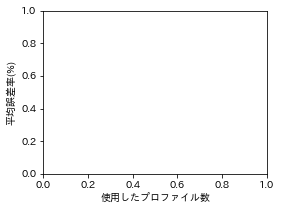

In [68]:
plt.figure(figsize=(4, 3))
plt.xlabel("使用したプロファイル数")
plt.ylabel("平均誤差率(%)")

In [69]:
# pd.get_option("display.max_columns")
# pd.get_option("display.max_rows")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [70]:
# ベンチマーク名・関数名・プロセス数・問題サイズを指定することで、その条件での関数コール回数を取得する関数

def returnSpecificData(benchmarkName="cg", functionName=".TAU_application", process=256, benchmarkClass="D"):
    targetRawDF = returnRawDF(Benchmark=benchmarkName, functionName=functionName, benchmarkClass=[
                              benchmarkClass], FixedProcess=process, Processes=[process], FixedBenchmarkClass=benchmarkClass)
    return targetRawDF.iat[0, 0]
# returnSpecificData(benchmarkName="mg", functionName="BUBBLE", process=256, benchmarkClass="B")

In [71]:
# bt, sp以外のベンチマーク名のリスト
benchmarks = ["cg", "ep", "ft", "is", "lu", "mg"]
# pandasのDFをprintした時の幅を広げる
pd.set_option('display.width', 100)

<Figure size 1144x800 with 0 Axes>

Text(0, 0.5, '関数コール回数')

Text(0.5, 0, '実行コア数')

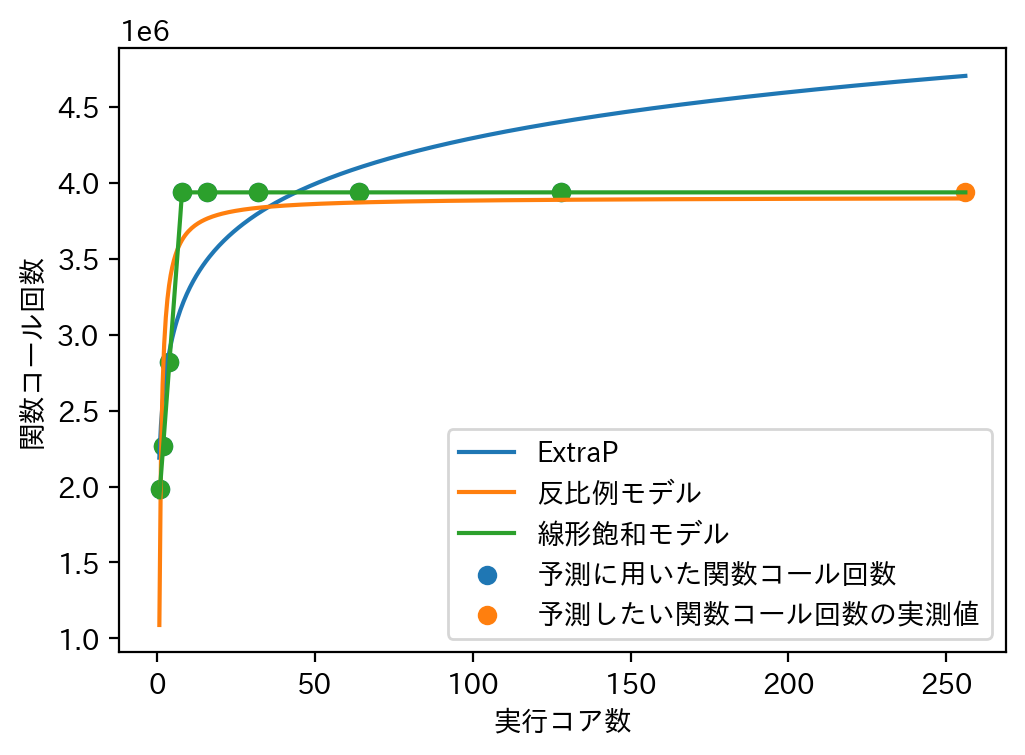

In [72]:
plt.figure(figsize=(5.72, 4), dpi=200)

# Extra-PでfixProcessデータを入力して出力したモデルの図時
plot_x = np.linspace(0.8, 256, 500)
# -3590464.6990329633 + 3759195.349891038 * p^(1/4)
plot_y = []
for x in plot_x:
    plot_y.append(2286768.3333333326 + 301997.61904761934 * math.log2(x)**(1))
plt.plot(plot_x, plot_y, label="ExtraP")

x = [1, 2, 4, 8, 16, 32, 64, 128]
y = [1984770.0, 2263540.0, 2821070.0, 3936140.0,
     3936140.0, 3936140.0, 3936140.0, 3936140.0]
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)
plt.scatter(x, y, marker="o", label="予測に用いた関数コール回数")
plot_x = np.array(plot_x).reshape(-1, 1)
x_target = [256]
y_target = [3936140]
plt.scatter(x_target, y_target, marker="o", label="予測したい関数コール回数の実測値")

benchmarkName = "CG"
functionName = "ICNVRT"

# 線形モデル
# 対数モデル

# 反比例モデル
modelIpMk2 = ModelIp_mk2(train_x=x, train_y=y, target_x=x_target, target_y=y_target,
                         benchmark_name=benchmarkName, function_name=functionName)
modelIpMk2.calc_lr()
plot_y_IpMk2 = modelIpMk2.predict(plot_x)
plt.plot(plot_x, plot_y_IpMk2, label="反比例モデル")
# 線形飽和モデル
modelBranchMk2 = ModelBranch_mk2(train_x=x, train_y=y, target_x=x_target,
                                 target_y=y_target, benchmark_name=benchmarkName, function_name=functionName)
modelBranchMk2.calc_lr()
plot_y_BranchMk2 = modelBranchMk2.predict(plot_x)
plt.plot(plot_x, plot_y_BranchMk2, label="線形飽和モデル")
# # 線形モデル
# model_lin = ModelLin(x, y, "CG", "ICNVRT", test_ratio=0)
# model_lin.calc_lr()
# plot_y_lin = model_lin.predict(plot_x)
# plt.plot(plot_x, plot_y_lin, label="線形モデル")
# # 対数モデル
# model_log10 = ModelLog10(x, y, "CG", "ICNVRT", test_ratio=0)
# model_log10.calc_lr()
# plot_y_log10 = model_log10.predict(plot_x)
# plt.plot(plot_x, plot_y_log10, label="対数モデル")
# # 反比例モデル
# model_ip = ModelIP(x, y, "CG", "ICNVRT", test_ratio=0)
# model_ip.calc_lr()
# plot_y_ip = model_ip.predict(plot_x)
# plt.plot(plot_x, plot_y_ip, label="反比例モデル")
# # 線形飽和モデル
# model_branch = ModelBranch(x, y, "CG", "ICNVRT", test_ratio=0)
# model_branch.calc_lr()
# plot_y_branch = model_branch.predict(plot_x)
# plt.plot(plot_x, plot_y_branch, label="線形飽和モデル")
# 凡例の表示
plt.legend()
# 軸ラベルの設定
plt.ylabel("関数コール回数")
plt.xlabel("実行コア数")

plt.scatter(x, y, marker="o")

In [73]:
# 実際にプロットする


# print(f"fix={fix}, benchmarkClasses={benchmarkClasses}, fixedProcess={fixedProcess}, Processes={processes}, FixedBenchmarkClass={fixedBenchmarkClass}")
# print(f"targetNumOfProcess={targetNumOfProcess}, targetProblemSize={fixedBenchmarkClass}, fix={fix}")

# DF = returnRawDFperBenchmark(Benchmark="mg", fix="Process", benchmarkClass=["A", "B", "C", "D"], Processes=[
#                              1, 2, 4, 8, 16, 32, 64, 128, 256], FixedBenchmarkClass="B", FixedProcess=64)
# DF.dropna(how='any')
# DF

In [74]:
benchmarkNamesExcludeBTSP = ["cg", "ep", "ft", "is", "lu", "mg"]
# classes = ["A", "B", "C", "D"]
classes = ["B"]
processes = [2, 4, 8, 16, 32, 64, 128, 256]
targetIndex = -1
csvDirPath = "./csv_files/"

dfByDatumExcludeBTSP = returnDFSummarizedData(
    benchmarkNames=benchmarkNamesExcludeBTSP, classes=classes, processes=processes, targetIndex=targetIndex, csvDirPath=csvDirPath)
# dfByDatumExcludeBTSP

dictForLatexTable = {}
numOfData = 0
for benchmarkName in benchmarkNamesExcludeBTSP:
    dictForLatexTable[benchmarkName] = dfByDatumExcludeBTSP[dfByDatumExcludeBTSP["benchmarkName"] == benchmarkName]
    numOfData += len(
        dfByDatumExcludeBTSP[dfByDatumExcludeBTSP["benchmarkName"] == benchmarkName])

numOfData

156

In [75]:


listForDF = []

for benchmarkName in benchmarkNamesExcludeBTSP:
    listForDF.append(returnSeriesOfDatumPerBenchmark(
        inputDF=dictForLatexTable[benchmarkName]))
DF = pd.DataFrame(listForDF)
print(DF.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
benchmarkName &      ModelIp &      ModelLog & ModelBranch &     ModelLin \\
\midrule
           CG &         0(-) & 13(11.7,11.7) & 18(0.0,0.0) &  69(0.0,0.0) \\
           EP &         0(-) &          0(-) &        0(-) & 100(0.0,0.0) \\
           FT &   9(0.0,0.0) &          0(-) &        0(-) &  91(0.0,0.0) \\
           IS &  19(0.0,0.0) &          0(-) &        0(-) &  81(0.0,0.0) \\
           LU & 30(0.0,25.9) &          0(-) &        0(-) &  70(0.0,0.0) \\
           MG &         0(-) &    3(0.5,0.5) &        0(-) &  97(0.0,3.4) \\
\bottomrule
\end{tabular}



In [76]:
test_returnSeriesOfDatumPerBenchmark()

In [77]:
resultIs = dictForLatexTable["is"]
# resultIs
resultIsAtModelBranch = resultIs[resultIs["objectBestModelName"]
                                 == "ModelBranch"]
datumX = resultIsAtModelBranch["usedDataX"].tolist()
datumY = resultIsAtModelBranch["usedDataY"].tolist()

datumX
datumY

# returnSeriesOfData(benchmarkName="is", functionName="double_randlc(double_*_double_*)", rawX=dataX, rawY=dataY, fixProcessOrClass="Class", fixed="B", targetProcess=256, targetBenchmarkClass="B", targetFunctionCallNum=-1, csvDirPath="./csv_files")

[]

[]

In [78]:
resultIs = dictForLatexTable["ft"]
# resultIs
resultIsAtModelBranch = resultIs[resultIs["objectBestModelName"]
                                 == "ModelBranch"]
resultIsAtModelBranchOfNotLowMAPE = resultIsAtModelBranch[
    resultIsAtModelBranch["MAPEOfBestModel"] > 1]
resultIsAtModelBranchOfNotLowMAPE
datumX = resultIsAtModelBranchOfNotLowMAPE["usedDataX"].tolist()
datumY = resultIsAtModelBranchOfNotLowMAPE["usedDataY"].tolist()

datumX
datumY

for dataIndex in range(len(datumX)):
    plt.figure()
    plt.scatter(datumX[dataIndex], datumY[dataIndex])

# returnSeriesOfData(benchmarkName="is", functionName="double_randlc(double_*_double_*)", rawX=dataX, rawY=dataY, fixProcessOrClass="Class", fixed="B", targetProcess=256, targetBenchmarkClass="B", targetFunctionCallNum=-1, csvDirPath="./csv_files")

,benchmarkName,functionName,usedDataX,usedDataY,numOfData,ProcessOrClass,fixed,targetProcess,targetProblemSize,targetNumOfFunctionCall,objectLinModel,MAPEOfLinModel,objectIpModel,MAPEOfIpModel,objectLogModel,MAPEOfLogModel,objectBranchModel,MAPEOfBranchModel,objectBestModelName,MAPEOfBestModel,RelativeErrorRate


[]

[]

In [79]:
# %reset

In [80]:
# ノートブック中で変数のみを記述することでデータフレームをきれいに表示させる設定の有効化
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 問題サイズD, コア数256での関数コール回数を予測する

In [81]:
# TODO：BT, SP以外のベンチマーク名を入れる
benchmarkNames = ['cg', 'ep', 'ft', 'is', 'lu', 'mg']
classes = ["A", "B", "C", "D"]
processes = [2, 4, 8, 16, 32, 64, 128, 256]

dictForSummarizedResult = {}
columnName = ["benchmarkName", "functionName", "score", "relativeErrorRate"]
dfForSummarizedResult = pd.DataFrame(columns=columnName)
for benchmarkName in benchmarkNames:
    # ベンチマークごとにscoreを保持するためのリスト
    listForSummarizedResultPerBenchmarkName = []
    # 学習用生データ
    DF = returnCollectedExistingData(benchmarkNames=[
                                     benchmarkName], classes=classes, processes=processes, csvDirPath="./csv_files/")
    # 重複のない関数名のリスト
    functionNames = list(set(DF["functionName"]))
    usefulFunctionNames = []
    # このループで関数ごとのデータが問題サイズパターン数xコア数パターン数 分だけ存在する関数名のリストを作成する
    for functionName in functionNames:
        # 関数ごとに生データを集計
        dfPerFunction = DF[DF["functionName"] == functionName]
        if len(classes) * len(processes) == len(dfPerFunction):
            usefulFunctionNames.append(functionName)
    if len(usefulFunctionNames) == 0:
        continue
    # 関数ごとのデータを抽出
    for functionName in usefulFunctionNames:
        # 問題サイズを数値化したカラムを追加
        listBenchmarkClass = DF["benchmarkClass"].tolist()
        DFWithNumInBenchmarkClass = DF.assign(
            benchmarkClassInNum=convertBenchmarkClasses_problemSizeInNPB(listBenchmarkClass))
        # 学習用データ
        dfPerFunctionForTrain = DFWithNumInBenchmarkClass[(
            DFWithNumInBenchmarkClass["functionName"] == functionName)]
        dfPerFunctionForTest = DFWithNumInBenchmarkClass[(DFWithNumInBenchmarkClass["functionName"] == functionName) & (
            DFWithNumInBenchmarkClass["benchmarkClass"] == "D") & (DFWithNumInBenchmarkClass["process"] == 256)]

        # x:説明変数, t:目的変数
        trainX = dfPerFunctionForTrain[["process", "benchmarkClassInNum"]]
        trainT = dfPerFunctionForTrain[["functionCallNum"]]
        testX = dfPerFunctionForTest[["process", "benchmarkClassInNum"]]
        testT = dfPerFunctionForTest[["functionCallNum"]]
        # 重回帰分析する
        reg_model = LinearRegression()
        reg_model.fit(trainX, trainT)
        # 関数ごとの結果をベンチマークごとの結果に入れる
        scorePerFunction = reg_model.score(trainX, trainT)
        listForSummarizedResultPerBenchmarkName.append(scorePerFunction)
        # 予測を実施して、相対誤差を算出
        predictedTByTestX = reg_model.predict(testX)
        predictedData = predictedTByTestX[0][0]
        realData = testT["functionCallNum"].tolist()[0]
        relativeErrorPerFunction = abs(predictedData - realData)/realData * 100
        ##
        dfPerFunction = pd.DataFrame(index=columnName, data=[
                                     benchmarkName, functionName, scorePerFunction, relativeErrorPerFunction]).T
        dfForSummarizedResult = dfForSummarizedResult.append(dfPerFunction)

# ( A ~ D ) * (1 ~ 256) のすべての条件を
# 満たしていたら、リストに追加
# 満たしていなければ、なにもしない

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

In [82]:
dfForSummarizedResult

,benchmarkName,functionName,score,relativeErrorRate
0,cg,VECSET,0.632067,19.005114
0,cg,ICNVRT,0.630252,19.304067
0,cg,ALLOC_SPACE,1.0,0.0
0,cg,MPI_Send(),0.484017,1.208868
0,cg,MPI_Irecv(),0.484017,1.208868
0,cg,MPI_Comm_rank(),1.0,0.0
0,cg,MAKEA,1.0,0.0
0,cg,MPI_Reduce(),1.0,0.0
0,cg,CG,1.0,0.0
0,cg,CONJ_GRAD,0.355806,0.012929


In [83]:
inputDF = dfForSummarizedResult


benchmarkNamesInDF = list(set(dfForSummarizedResult["benchmarkName"].tolist()))

listForLatexTable = []
for benchmarkName in benchmarkNamesInDF:
    print(benchmarkName)
    inputDFPerBenchmark = inputDF[inputDF["benchmarkName"] == benchmarkName]
    meanData = inputDFPerBenchmark.mean()
    print(type(meanData))
    meanData["benchmarkName"] = f"{benchmarkName.upper()}({len(inputDFPerBenchmark)})"
    listForLatexTable.append(meanData)
DF = pd.DataFrame(listForLatexTable)

DF = DF.sort_index(axis='columns')
DF
# relativeErrorの単位は[%]ではない。scoreの値はscore()で取得できたもの
DF.columns = ["ベンチマーク名(関数の個数)", "MAPE(予測対象関数コール回数に対する)", "決定係数"]
print(DF.to_latex(index=False))

cg
<class 'pandas.core.series.Series'>
is
<class 'pandas.core.series.Series'>
ft
<class 'pandas.core.series.Series'>
lu
<class 'pandas.core.series.Series'>
ep
<class 'pandas.core.series.Series'>


,benchmarkName,relativeErrorRate,score
0,CG(22),2.770629,0.850102
1,IS(6),0.000000,1.000000
2,FT(26),199.503045,0.755681
3,LU(10),3.059682,0.674026
4,EP(9),0.000000,1.000000


\begin{tabular}{lrr}
\toprule
ベンチマーク名(関数の個数) &  MAPE(予測対象関数コール回数に対する) &     決定係数 \\
\midrule
        CG(22) &               2.770629 & 0.850102 \\
         IS(6) &               0.000000 & 1.000000 \\
        FT(26) &             199.503045 & 0.755681 \\
        LU(10) &               3.059682 & 0.674026 \\
         EP(9) &               0.000000 & 1.000000 \\
\bottomrule
\end{tabular}



In [84]:
forInputDF = returnDFSummarizedData(
    benchmarkNames=["cg", "ep", "ft", "is", "lu", "mg"],
    classes=["C"],
    processes=[2, 4, 8, 16, 32, 64, 128, 256],
    targetIndex=-1,
    csvDirPath="./csv_files/",
)

benchmarkNames = list(set(forInputDF["benchmarkName"].tolist()))
columnsNames = ["ベンチマーク名(関数の個数)", "MAPE(予測対象関数コール回数に対する)"]
listForRelativeErrorTable = []
for benchmarkName in benchmarkNames:
    forInputDFPerBenchmark = forInputDF[forInputDF["benchmarkName"]
                                        == benchmarkName]
    column1 = f"{benchmarkName.upper()}({len(forInputDFPerBenchmark)})"
    seriesOfMean = forInputDFPerBenchmark.mean()
    seriesOfMeanRelativeErrorRate = seriesOfMean["RelativeErrorRate"]
    column2 = int(seriesOfMeanRelativeErrorRate * 100) / 100
    listForRelativeErrorTable.append([{column1}, {column2}])
print(pd.DataFrame(listForRelativeErrorTable,
      columns=columnsNames).to_latex(index=False))

# forInputDFPerBenchmark

\begin{tabular}{ll}
\toprule
ベンチマーク名(関数の個数) & MAPE(予測対象関数コール回数に対する) \\
\midrule
      \{CG(22)\} &                \{7.85\} \\
      \{IS(21)\} &                 \{0.0\} \\
      \{FT(32)\} &                 \{0.0\} \\
      \{MG(30)\} &                \{2.78\} \\
      \{LU(42)\} &               \{22.45\} \\
       \{EP(9)\} &                 \{0.0\} \\
\bottomrule
\end{tabular}



In [85]:
pd.DataFrame(listForRelativeErrorTable, columns=columnsNames)

,ベンチマーク名(関数の個数),MAPE(予測対象関数コール回数に対する)
0,{CG(22)},{7.85}
1,{IS(21)},{0.0}
2,{FT(32)},{0.0}
3,{MG(30)},{2.78}
4,{LU(42)},{22.45}
5,{EP(9)},{0.0}


In [86]:
benchmarkNames = ['cg', 'ep', 'ft', 'is', 'lu', 'mg']

classes = ["A", "B", "C", "D"]
processes = [2, 4, 8, 16, 32, 64, 128, 256]
targetClass = classes[-1]
targetProcess = processes[-1]

# 学習用生データ
DF = returnCollectedExistingData(benchmarkNames=benchmarkNames,
                                 classes=classes, processes=processes, csvDirPath="./csv_files/")
DFByValidFunction = returnDFwithFunctionsExecUnderAllConditions(
    inputDF=DF, classes=classes, processes=processes)
# 問題サイズを数値化したカラムを追加
listBenchmarkClass = DFByValidFunction["benchmarkClass"].tolist()
# 生データにカラムなどを加えた整形済みのDF
shapedDF = DFByValidFunction.assign(
    benchmarkClassInNum=convertBenchmarkClasses_problemSizeInNPB(listBenchmarkClass))

# 説明変数のカラム名のリスト
expVarColNames = ["process", "benchmarkClassInNum"]
# 目的変数のカラム名のリスト
resVarColNames = ["functionCallNum"]

# データ内にあるベンチマーク名のリスト
benchmarkNames = set(shapedDF["benchmarkName"].tolist())

# 集計前のデータを作成
# DFで[functionName | benchmarkName | expVarDatumDict | resVarDatumDict | modelsName | dictAggregateResult]がカラム名

dictToMakeSummary = {}
for benchmarkName in benchmarkNames:
    DFperBenchmark = shapedDF[shapedDF["benchmarkName"] == benchmarkName]
    # すべての条件で実行された関数名のリスト
    validFunctionNames = list(
        set(DFperBenchmark["functionName"].tolist()))
    listToMakeDF = []
    print(f"benchmakName={benchmarkName}, 関数の個数:{len(validFunctionNames)}")
    for validFunctionName in validFunctionNames:
        # 3モデルを一気に作成するmodels()を利用
        inputDFperFunction = DFperBenchmark[(DFperBenchmark["functionName"] == validFunctionName) & (
            DFperBenchmark["benchmarkName"] == benchmarkName)].reset_index()
        targetDFperFunction = inputDFperFunction[(inputDFperFunction["benchmarkClass"] == targetClass) & (
            inputDFperFunction["process"] == targetProcess)]
        # 説明変数のカラム名リストを作成
        expVarColNames = ["process", "benchmarkClassInNum"]
        # 目的変数のカラム名リストを作成
        resVarColNames = ["functionCallNum"]
        # モデルを一括で作成
        if len(targetDFperFunction) == 0:
            print(
                f"benchmarkName={benchmarkName}, functionName={validFunctionName}")
            continue
        returnedDF = returnDFtoMakeSummary(inputDF=inputDFperFunction, benchmarkName=benchmarkName, validFunctionName=validFunctionName,
                                           targetClass=targetClass, targetProcess=targetProcess, expVarColNames=expVarColNames, resVarColNames=resVarColNames)
        listToMakeDF.append(returnedDF)
    if len(listToMakeDF) == 0:
        continue
    inputDFtoMakeDFperBenchmark = pd.concat(
        listToMakeDF).reset_index(drop=True)
    returnedDict = convertDictToMakeSummary(
        inputDF=inputDFtoMakeDFperBenchmark, modelAdoptionRate=True, averageRelativeError=True)
    dictToMakeSummary[benchmarkName] = returnedDict
# TODO:作成したDFを入力として集計関数を実行

modelAdoptionRate = returnedDict["modelAdoptionRate"]
averageRelativeError = returnedDict["averageRelativeError"]
returnedDict

modelAdoptionRate

averageRelativeError

benchmakName=cg, 関数の個数:10
benchmakName=is, 関数の個数:8
benchmakName=ft, 関数の個数:13
benchmakName=lu, 関数の個数:8
benchmarkName=lu, functionName=double_find_my_seed(int_int_long_double_double)
benchmarkName=lu, functionName=void_create_seq(double_double)
benchmarkName=lu, functionName=MPI_Comm_dup()
benchmarkName=lu, functionName=void_rank(int)
benchmarkName=lu, functionName=double_randlc(double_*_double_*)
benchmarkName=lu, functionName=MPI_Alltoallv()
benchmarkName=lu, functionName=void_full_verify(void)
benchmarkName=lu, functionName=void_alloc_space(void)
benchmakName=ep, 関数の個数:1


{'modelAdoptionRate': {'modelLin': {'count': 1,
   'min': array([0.]),
   'max': 0.0},
  'modelIp': {'count': 0, 'min': inf, 'max': 0.0},
  'modelLog': {'count': 0, 'min': inf, 'max': 0.0}},
 'averageRelativeError': 0.0}

{'modelLin': {'count': 1, 'min': array([0.]), 'max': 0.0},
 'modelIp': {'count': 0, 'min': inf, 'max': 0.0},
 'modelLog': {'count': 0, 'min': inf, 'max': 0.0}}

0.0

In [87]:
columnBenchmarkName = []
# 採用割合
columnAdoptionRateLog = []
columnAdoptionRateIp = []
columnAdoptionRateLin = []
# 平均相対誤差率
columnAverageRelativeError = []

for benchmarkName in dictToMakeSummary.keys():
    # 関数の個数
    numOfFunctions = 0

    # 採用割合
    modelAdoptionRate = dictToMakeSummary[benchmarkName]["modelAdoptionRate"]
    modelNames = list(modelAdoptionRate.keys())
    for modelName in modelNames:
        #         print(modelName)
        numOfFunctions += modelAdoptionRate[modelName]["count"]
    dictToMakeSummary[benchmarkName]["関数の個数"] = numOfFunctions

    # 採用割合を算出するモデルが３つであることを仮定している
    # modelLog
    adoptionRateLog = int(
        modelAdoptionRate["modelLog"]["count"]/numOfFunctions * 100)
    if modelAdoptionRate["modelLog"]["count"] == 0:
        logMinMAPE = "-"
        logMaxMAPE = "-"
    else:
        logMinMAPE = int(float(modelAdoptionRate["modelLog"]["min"])*10)/10
        logMaxMAPE = int(float(modelAdoptionRate["modelLog"]["max"])*10)/10
    # modelIp
    adoptionRateIp = int(
        modelAdoptionRate["modelIp"]["count"]/numOfFunctions * 100)
    if modelAdoptionRate["modelIp"]["count"] == 0:
        ipMinMAPE = "-"
        ipMaxMAPE = "-"
    else:
        ipMinMAPE = int(float(modelAdoptionRate["modelIp"]["min"])*10)/10
        ipMaxMAPE = int(float(modelAdoptionRate["modelIp"]["max"])*10)/10
    # modelLin
    adoptionRateLin = 100 - adoptionRateIp - adoptionRateLog
    if modelAdoptionRate["modelLin"]["count"] == 0:
        linMinMAPE = "-"
        linMaxMAPE = "-"
    else:
        linMinMAPE = int(float(modelAdoptionRate["modelLin"]["min"])*10)/10
        linMaxMAPE = int(float(modelAdoptionRate["modelLin"]["max"])*10)/10

    # Latex化するためにカラムとして入れる
    columnBenchmarkName.append(f"{benchmarkName.upper()}({numOfFunctions})")
    columnAdoptionRateLog.append(
        f"{adoptionRateLog}({logMinMAPE},{logMaxMAPE})")
    columnAdoptionRateIp.append(f"{adoptionRateIp}({ipMinMAPE},{ipMaxMAPE})")
    columnAdoptionRateLin.append(
        f"{adoptionRateLin}({linMinMAPE},{linMaxMAPE})")

    # 相対誤差率
    averageRelativeError = dictToMakeSummary[benchmarkName]["averageRelativeError"]
    columnAverageRelativeError.append(int(averageRelativeError*100)/100)

In [88]:
dictToMakeSummary

columnBenchmarkName

columnAdoptionRateLog

columnAdoptionRateIp

columnAdoptionRateLin

columnAverageRelativeError

# 採用割合
採用割合 = pd.DataFrame({"ベンチマーク名": columnBenchmarkName,
                    "反比例モデル": columnAdoptionRateIp, "対数モデル": columnAdoptionRateLog, "線形モデル": columnAdoptionRateLin})
# 相対誤差率
相対誤差率 = pd.DataFrame({"ベンチマーク名": columnBenchmarkName,
                     "相対誤差率[%]": columnAverageRelativeError})

print(採用割合.to_latex(index=False))

print(相対誤差率.to_latex(index=False))

{'cg': {'modelAdoptionRate': {'modelLin': {'count': 7,
    'min': array([0.]),
    'max': array([76.36553853])},
   'modelIp': {'count': 1,
    'min': array([18.97934597]),
    'max': array([18.97934597])},
   'modelLog': {'count': 2,
    'min': array([37.28698245]),
    'max': array([37.28698245])}},
  'averageRelativeError': 10.8345,
  '関数の個数': 10},
 'is': {'modelAdoptionRate': {'modelLin': {'count': 7,
    'min': array([0.]),
    'max': 0.0},
   'modelIp': {'count': 1,
    'min': array([1237.54378251]),
    'max': array([1237.54378251])},
   'modelLog': {'count': 0, 'min': inf, 'max': 0.0}},
  'averageRelativeError': 2.5005,
  '関数の個数': 8},
 'ft': {'modelAdoptionRate': {'modelLin': {'count': 8,
    'min': array([0.]),
    'max': array([1484.53872393])},
   'modelIp': {'count': 5,
    'min': array([5.69381599]),
    'max': array([6.85185185])},
   'modelLog': {'count': 0, 'min': inf, 'max': 0.0}},
  'averageRelativeError': 13.139000000000001,
  '関数の個数': 13},
 'ep': {'modelAdoptionRate

['CG(10)', 'IS(8)', 'FT(13)', 'EP(1)']

['20(37.2,37.2)', '0(-,-)', '0(-,-)', '0(-,-)']

['10(18.9,18.9)', '12(1237.5,1237.5)', '38(5.6,6.8)', '0(-,-)']

['70(0.0,76.3)', '88(0.0,0.0)', '62(0.0,1484.5)', '100(0.0,0.0)']

[10.83, 2.5, 13.13, 0.0]

\begin{tabular}{llll}
\toprule
ベンチマーク名 &            反比例モデル &         対数モデル &          線形モデル \\
\midrule
 CG(10) &     10(18.9,18.9) & 20(37.2,37.2) &   70(0.0,76.3) \\
  IS(8) & 12(1237.5,1237.5) &        0(-,-) &    88(0.0,0.0) \\
 FT(13) &       38(5.6,6.8) &        0(-,-) & 62(0.0,1484.5) \\
  EP(1) &            0(-,-) &        0(-,-) &   100(0.0,0.0) \\
\bottomrule
\end{tabular}

\begin{tabular}{lr}
\toprule
ベンチマーク名 &  相対誤差率[\%] \\
\midrule
 CG(10) &     10.83 \\
  IS(8) &      2.50 \\
 FT(13) &     13.13 \\
  EP(1) &      0.00 \\
\bottomrule
\end{tabular}



In [89]:
class ModelBranchForMultipleRegression(ModelBaseForMultipleRegression):
    # 線形モデル（重回帰分析）

    def transformDataForModel(self, inputDF):
        # inputDFで与えられたデータをモデルに適した形に変形する
        return(inputDF)

    def setUpDataBeforeCalcLr(self):
        # 説明変数・目的変数を変換する関数
        # 分岐を実際に実行するかを判断するためのフラグ
        enableBranch = False
        # enableBranch == False ---> 分岐しない
        # enableBranch == True  ---> 分岐する
        
        # TODO:分岐点の探索
        
        # enableBranchの値に応じて分岐するかどうか
        
        # モデル構築用データ
        self.dataXForPredict = self.transformDataForModel(
            self.rawExplanaoryVariable)
        self.dataTForPredict = self.transformDataForModel(
            self.rawResponseVariable)
        # テスト用データ
        self.dataXForTest = self.transformDataForModel(
            self.rawExplanaoryVariableForTest)
        self.dataTForTest = self.transformDataForModel(
            self.rawResponseVariableForTest)

    def calcLr(self):
        # 実際にモデルを構築する
        self.lr = LinearRegression()
        self.lr.fit(self.dataXForPredict, self.dataTForPredict)

    def predict(self, inputDF):
        # inputDFのデータから構築されたモデルを使って予測を行う

        # inputDFから説明変数データのみを取得
        inputDFOnlyExplanatoryVariableColumn = inputDF[self.explanatoryVariableColumnNames]
        # 予測を実行
        result = self.lr.predict(inputDFOnlyExplanatoryVariableColumn)

        return(result)


def test_ModelBranchForMultipleRegression():
    # 単なる線形モデル
    # 説明変数
    plotX = np.linspace(0, 20, 10)
    plotY = np.linspace(20, 40, 10)
    plotZ = np.linspace(40, 60, 10)
    # 目的変数
    plotT = plotX + 2 * plotY + 3 * plotZ + 4

    # DFを作成する
    # カラム名のリスト
    columnNames = ["plotX", "plotY", "plotZ", "plotT"]
    datumForDF = [plotX, plotY, plotZ, plotT]
    inputDFForTest = pd.DataFrame(index=columnNames, data=datumForDF).T
    inputDFForTest["functionName"] = "functionName"

    # 目的変数・説明変数のカラム名のリスト
    # 目的変数のカラム名のリスト
    columnNamesForExp = columnNames[:-1]
    # 説明変数のカラム名のリスト
    columnNamesForRes = columnNames[-1:]

    # 予測をする
    # モデルオブジェクトの作成
    objectModel = ModelBranchForMultipleRegression(inputDF=inputDFForTest, explanatoryVariableColumnNames=columnNamesForExp,
                                                   responseVariableColumnNames=columnNamesForRes, conditionDictForTest={})
    # モデルの生成の準備
    objectModel.setUpDataBeforeCalcLr()
    # モデルの生成
    objectModel.calcLr()
    # モデルによる予測
    # 入力データDFを作成
    inputDFForPredict = pd.DataFrame(inputDFForTest.tail(1))
    predictedNum = objectModel.predict(inputDFForPredict)

    # 相対誤差率でテスト対象のデータが想定通りに動作しているかを判断する
    # 相対誤差率を計算するために実データを取得する
    realNum = plotT[-1]
    relativeErrorRate = returnRelativeErrorRate(
        realNum=realNum, predictedNum=predictedNum)

    assert relativeErrorRate < 1

    # 線形飽和モデル
    branchIndex = 5
    # 説明変数
    branchX = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    branchY = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    branchZ = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
    # 目的変数
    branchT_X = returnListForBranchModel(
        inputList=branchX, branchIndex=branchIndex, a=1, b=2)
    branchT_Y = returnListForBranchModel(
        inputList=branchY, branchIndex=branchIndex, a=3, b=4)
    branchT_Z = returnListForBranchModel(
        inputList=branchZ, branchIndex=branchIndex, a=5, b=6)
    branchT = []
    for numX, numY, numZ in zip(branchT_X, branchT_Y, branchT_Z):
        branchT.append(numX+numY+numZ)
    # DFを作成する
    # カラム名のリスト
    inputDFForTest = pd.DataFrame(
        {"branchX": branchX, "branchY": branchY, "branchZ": branchZ, "branchT": branchT})
    # 目的変数のカラム名のリスト
    expVarName = ["branchX", "branchY", "branchZ"]
    # 説明変数のカラム名のリスト
    resVarName = ["branchT"]
    # 関数名
    inputDFForTest["functionName"] = "functionName"
    # 予測のためのモデルオブジェクトの作成
    objectModel = ModelBranchForMultipleRegression(
        inputDF=inputDFForTest, explanatoryVariableColumnNames=expVarName, responseVariableColumnNames=resVarName, conditionDictForTest={})
    # モデルの生成の準備
    objectModel.setUpDataBeforeCalcLr()
    objectModel.calcLr()
    # モデルによる予測
    inputDFForPredict = pd.DataFrame(inputDFForTest.tail(1))
    predictedNum = objectModel.predict(inputDFForPredict)
    # 相対誤差率でテスト対象のデータに焚いてモデルが想定通りに動作しているかを判断する
    realNum = branchT[-1]
    relativeErrorRate = returnRelativeErrorRate(
        realNum=realNum, predictedNum=predictedNum)
    print(f"relatieErrorRate={relativeErrorRate}")
    assert relativeErrorRate < 1


# test_ModelBranchForMultipleRegression()

In [90]:
benchmarkNamesExcludeBTSP = ["cg", "ep", "ft", "is", "lu", "mg"]
# classes = ["A", "B", "C", "D"]
classes = ["B"]
processes = [2, 4, 8, 16, 32, 64, 128, 256]
targetIndex = -1
csvDirPath = "./csv_files/"
modelNames = ["ModelLin", "ModelIp", "ModelLog", "ModelBranch"]

dfByDatumExcludeBTSP = returnDFSummarizedData(
    benchmarkNames=benchmarkNamesExcludeBTSP, classes=classes, processes=processes, targetIndex=targetIndex, csvDirPath=csvDirPath, modelNames=modelNames)
# dfByDatumExcludeBTSP

dictForLatexTable = {}
numOfData = 0
for benchmarkName in benchmarkNamesExcludeBTSP:
    dictForLatexTable[benchmarkName] = dfByDatumExcludeBTSP[dfByDatumExcludeBTSP["benchmarkName"] == benchmarkName]
    numOfData += len(
        dfByDatumExcludeBTSP[dfByDatumExcludeBTSP["benchmarkName"] == benchmarkName])

numOfData


listForDF = []

for benchmarkName in benchmarkNamesExcludeBTSP:
    listForDF.append(returnSeriesOfDatumPerBenchmark(
        inputDF=dictForLatexTable[benchmarkName]))
DF = pd.DataFrame(listForDF)
print(DF.to_latex(index=False))

156

\begin{tabular}{lllll}
\toprule
benchmarkName &      ModelIp &      ModelLog & ModelBranch &     ModelLin \\
\midrule
           CG &         0(-) & 13(11.7,11.7) & 18(0.0,0.0) &  69(0.0,0.0) \\
           EP &         0(-) &          0(-) &        0(-) & 100(0.0,0.0) \\
           FT &   9(0.0,0.0) &          0(-) &        0(-) &  91(0.0,0.0) \\
           IS &  19(0.0,0.0) &          0(-) &        0(-) &  81(0.0,0.0) \\
           LU & 30(0.0,25.9) &          0(-) &        0(-) &  70(0.0,0.0) \\
           MG &         0(-) &    3(0.5,0.5) &        0(-) &  97(0.0,3.4) \\
\bottomrule
\end{tabular}



In [91]:
benchmarkNamesExcludeBTSP = ["cg", "ep", "ft", "is", "lu", "mg"]
# classes = ["A", "B", "C", "D"]
classes = ["B"]
processes = [2, 4, 8, 16, 32, 64, 128, 256]
targetIndex = -1
csvDirPath = "./csv_files/"
modelNames = ["ModelLin", "ModelIp", "ModelLog", "ModelBranch2"]

dfByDatumExcludeBTSP = returnDFSummarizedData(
    benchmarkNames=benchmarkNamesExcludeBTSP, classes=classes, processes=processes, targetIndex=targetIndex, csvDirPath=csvDirPath, modelNames=modelNames)


dictForLatexTable = {}
numOfData = 0
for benchmarkName in benchmarkNamesExcludeBTSP:
    dictForLatexTable[benchmarkName] = dfByDatumExcludeBTSP[dfByDatumExcludeBTSP["benchmarkName"] == benchmarkName]
    numOfData += len(
        dfByDatumExcludeBTSP[dfByDatumExcludeBTSP["benchmarkName"] == benchmarkName])

numOfData


listForDF = []

for benchmarkName in benchmarkNamesExcludeBTSP:
    listForDF.append(returnSeriesOfDatumPerBenchmark(
        inputDF=dictForLatexTable[benchmarkName], modelNames=["ModelIp", "ModelLog", "ModelBranch2", "ModelLin"]))
DF = pd.DataFrame(listForDF)
print(DF.to_latex(index=False))

156

\begin{tabular}{lllll}
\toprule
benchmarkName &      ModelIp &      ModelLog & ModelBranch2 &     ModelLin \\
\midrule
           CG &         0(-) & 13(11.7,11.7) &  18(0.0,0.0) &  69(0.0,0.0) \\
           EP &         0(-) &          0(-) &         0(-) & 100(0.0,0.0) \\
           FT &   9(0.0,0.0) &          0(-) &         0(-) &  91(0.0,0.0) \\
           IS &  19(0.0,0.0) &          0(-) &         0(-) &  81(0.0,0.0) \\
           LU & 30(0.0,25.9) &          0(-) &         0(-) &  70(0.0,0.0) \\
           MG &         0(-) &    3(0.5,0.5) &         0(-) &  97(0.0,3.4) \\
\bottomrule
\end{tabular}



In [92]:
benchmarkNamesCG = ["cg"]
# classes = ["A", "B", "C", "D"]
classes = ["B"]
processes = [2, 4, 8, 16, 32, 64, 128, 256]
targetIndex = -1
csvDirPath = "./csv_files/"
modelNames = ["ModelLin", "ModelIp", "ModelLog", "ModelBranch"]
modelNames2 = ["ModelLin", "ModelIp", "ModelLog", "ModelBranch2"]

dfByDatumCG = returnDFSummarizedData(
    benchmarkNames=benchmarkNamesCG, classes=classes, processes=processes, targetIndex=targetIndex, csvDirPath=csvDirPath, modelNames=modelNames)
dfByDatumCG2 = returnDFSummarizedData(
    benchmarkNames=benchmarkNamesCG, classes=classes, processes=processes, targetIndex=targetIndex, csvDirPath=csvDirPath, modelNames=modelNames2)

dictForLatexTable = {}
dictForLatexTable2 = {}
numOfData = 0
numOfData2 = 0

for benchmarkName in benchmarkNamesCG:
    dictForLatexTable[benchmarkName] = dfByDatumCG[dfByDatumCG["benchmarkName"] == benchmarkName]
    numOfData += len(
        dfByDatumCG[dfByDatumCG["benchmarkName"] == benchmarkName])
    dictForLatexTable2[benchmarkName] = dfByDatumCG2[dfByDatumCG2["benchmarkName"] == benchmarkName]
    numOfData2 += len(
        dfByDatumCG2[dfByDatumCG2["benchmarkName"] == benchmarkName])


listForDF = []
for benchmarkName in benchmarkNamesCG:
    listForDF.append(returnSeriesOfDatumPerBenchmark(
        inputDF=dictForLatexTable[benchmarkName], modelNames=modelNames))
DF = pd.DataFrame(listForDF)
print(DF.to_latex(index=False))

listForDF2 = []
for benchmarkName in benchmarkNamesCG:
    listForDF2.append(returnSeriesOfDatumPerBenchmark(
        inputDF=dictForLatexTable2[benchmarkName], modelNames=modelNames2))
DF = pd.DataFrame(listForDF2)
print(DF.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
benchmarkName &     ModelLin & ModelIp &      ModelLog & ModelBranch \\
\midrule
           CG & 100(0.0,0.0) &    0(-) & 13(11.7,11.7) & 18(0.0,0.0) \\
\bottomrule
\end{tabular}

\begin{tabular}{lllll}
\toprule
benchmarkName &     ModelLin & ModelIp &      ModelLog & ModelBranch2 \\
\midrule
           CG & 100(0.0,0.0) &    0(-) & 13(11.7,11.7) &  18(0.0,0.0) \\
\bottomrule
\end{tabular}



In [93]:
columnNamesForCheck = ["functionName", "usedDataX", "usedDataY"]

listForDF2

[benchmarkName               CG
 ModelLin          100(0.0,0.0)
 ModelIp                   0(-)
 ModelLog         13(11.7,11.7)
 ModelBranch2       18(0.0,0.0)
 dtype: object]

In [94]:
dictForLatexTable[benchmarkName][columnNamesForCheck+["MAPEOfBranchModel"]]

,functionName,usedDataX,usedDataY,MAPEOfBranchModel
0,.TAU_application,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
1,ALLOC_SPACE,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
2,CG,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
3,CONJ_GRAD,"[2, 4, 8, 16, 32, 64, 128]","[31.0, 46.0, 76.0, 76.0, 76.0, 76.0, 76.0]",[0.0]
4,ICNVRT,"[2, 4, 8, 16, 32, 64, 128]","[561762.0, 943178.0, 1706010.0, 1706010.0, 170...",[2.9604637303681426e-15]
5,INITIALIZE_MPI,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
6,MAKEA,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
7,MPI_Barrier(),"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
8,MPI_Bcast(),"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
9,MPI_Comm_rank(),"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]


In [95]:
dictForLatexTable2[benchmarkName][columnNamesForCheck+["MAPEOfBranchModel2"]]

,functionName,usedDataX,usedDataY,MAPEOfBranchModel2
0,.TAU_application,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
1,ALLOC_SPACE,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
2,CG,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
3,CONJ_GRAD,"[2, 4, 8, 16, 32, 64, 128]","[31.0, 46.0, 76.0, 76.0, 76.0, 76.0, 76.0]",[0.0]
4,ICNVRT,"[2, 4, 8, 16, 32, 64, 128]","[561762.0, 943178.0, 1706010.0, 1706010.0, 170...",[2.9604637303681426e-15]
5,INITIALIZE_MPI,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
6,MAKEA,"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
7,MPI_Barrier(),"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
8,MPI_Bcast(),"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]
9,MPI_Comm_rank(),"[2, 4, 8, 16, 32, 64, 128]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",[0.0]


<Figure size 432x288 with 0 Axes>

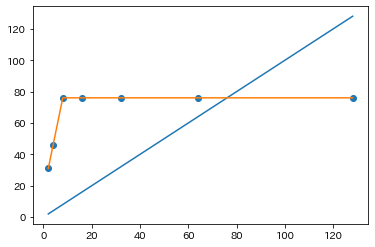

In [96]:
# 線形飽和モデルが最適となるデータ群の一つである GONJ_GRAD() で実験する
dfCG = dictForLatexTable["cg"]
CONJ_GRAD_DF = dfCG[dfCG["functionName"] == "CONJ_GRAD"]
x = list(CONJ_GRAD_DF["usedDataX"])[0]
y = list(CONJ_GRAD_DF["usedDataY"])[0]
CONJ_GRAD = {"x": x, "y": y}
plt.figure()
# 生データのプロット
plt.scatter(x, y)

# 分岐モデルで予測しプロット
modelBranch = ModelBranch(trainX=x, trainY=x)
modelBranch.calcLr()
predictedY = modelBranch.predict(x)
plt.plot(x, predictedY)
# 分岐モデル2で予測しプロット
modelBranch2 = ModelBranch2(trainX=x, trainY=y)
modelBranch2.calcLr()
predictedY = modelBranch2.predict(x)
plt.plot(x, predictedY)

In [97]:
modelBranch2.branchIndex

2